# **EDA**
### Inicialmente se definió trabajar con los *datastreams* con información referida a **provincias** más aquellos que refieran a **ingresos**. A modo de simplificar la densidad de datos. Además, aquellos referidos a nivel Nacional son obtenibles mediante los anteriores.


### A continuación se trabajara con los 7 archivos seleccionados, analizando distribuciones y explorando posibles gráficas y cruzamientos de datos que pueden ser de utilidad para el desarrollo de del *dashboard*

### **Creación diccionario de nombres para comodidad de trabajo**

In [1]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

archivos = os.listdir('./datastreams/')

archivos = [file for file in archivos if file.endswith('.csv') and 'provincia' in file]
archivos.append('ingresos_por_la_operacion_del_servicio_de_internet_fijo.csv')

diccio_nombres = {'df{}'.format(i+1): file for i, file in enumerate(archivos)}

In [2]:
diccio_nombres

{'df1': 'accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv',
 'df2': 'accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.csv',
 'df3': 'acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.csv',
 'df4': 'acceso_a_internet_fijo_por_tecnologia_y_provincia.csv',
 'df5': 'penetracion_del_internet_fijo_por_provincia_(accesos_por_cada_100_habitantes).csv',
 'df6': 'penetracion_del_internet_fijo_por_provincia_(accesos_por_cada_100_hogares).csv',
 'df7': 'ingresos_por_la_operacion_del_servicio_de_internet_fijo.csv'}

## Archivo --> '**accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv**'

In [134]:
diccio_nombres['df1']

'accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv'

In [135]:
df1 = pd.read_csv('./datastreams/' + diccio_nombres['df1'])
df1.head()

Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2022          3     Buenos Aires           4715469     6199  4721668
1  2022          3  Capital Federal           1545534     2145  1547679
2  2022          3        Catamarca             70292        1    70293
3  2022          3            Chaco            144141        5   144146
4  2022          3           Chubut            164874      904   165778

<Figure size 1200x600 with 0 Axes>

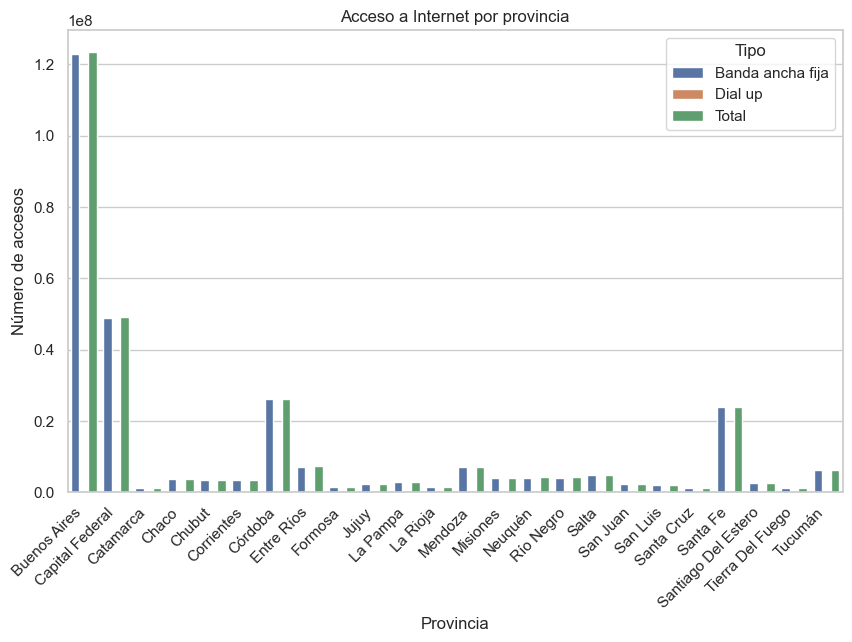

In [136]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

total_provincias = df1.groupby('Provincia').sum().reset_index().drop(columns=['Año', 'Trimestre'])

df_stacked = total_provincias.set_index('Provincia').stack().reset_index()
df_stacked.columns = ['Provincia', 'Tipo', 'Número de acceso']

# Crear el gráfico de barras apiladas con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Provincia', y='Número de acceso', hue='Tipo', data=df_stacked)

plt.xlabel("Provincia")
plt.ylabel("Número de accesos")
plt.title("Acceso a Internet por provincia")
plt.legend(title="Tipo", loc="upper right")

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()



Se puede observar que casi el total de las conexiones, independientemente de las provincias son de tipo banda ancha, quedando muy por debajo las conexiones de tipo *dial up*. Además, como era de esperarse, el mercado destaca ampliamente en Buenos Aires seguido por capital Federal. A estas siguen Córdoba y Santa Fé, dos grandes provincias con buen indice de desarrollo.

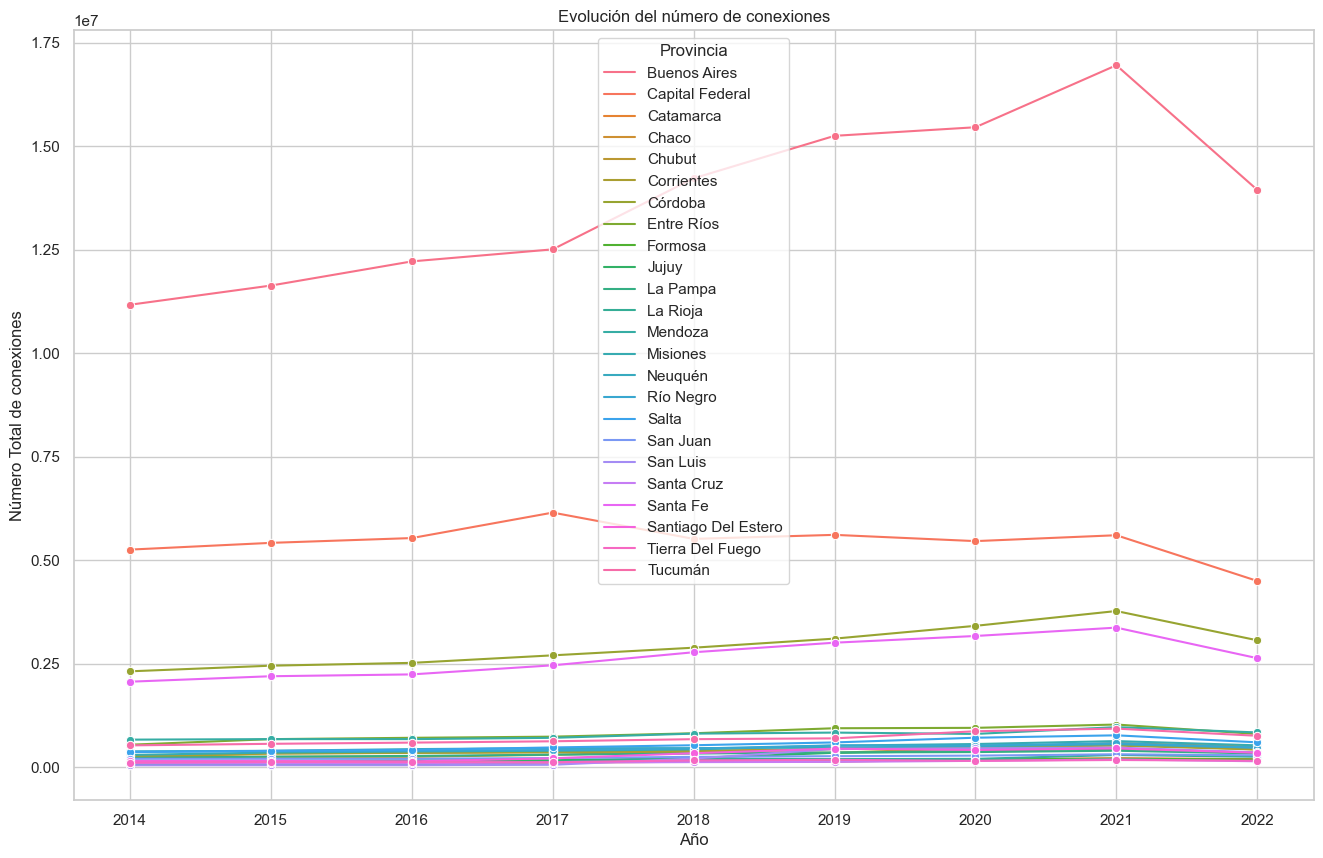

In [137]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

df1_año = df1.groupby(['Provincia','Año']).sum().drop(columns=['Trimestre'])

ax1 = sns.lineplot(x='Año', y='Total', hue='Provincia', data=df1_año, marker='o')

plt.xlabel('Año')
plt.ylabel('Número Total de conexiones')
plt.title('Evolución del número de conexiones')

plt.show()

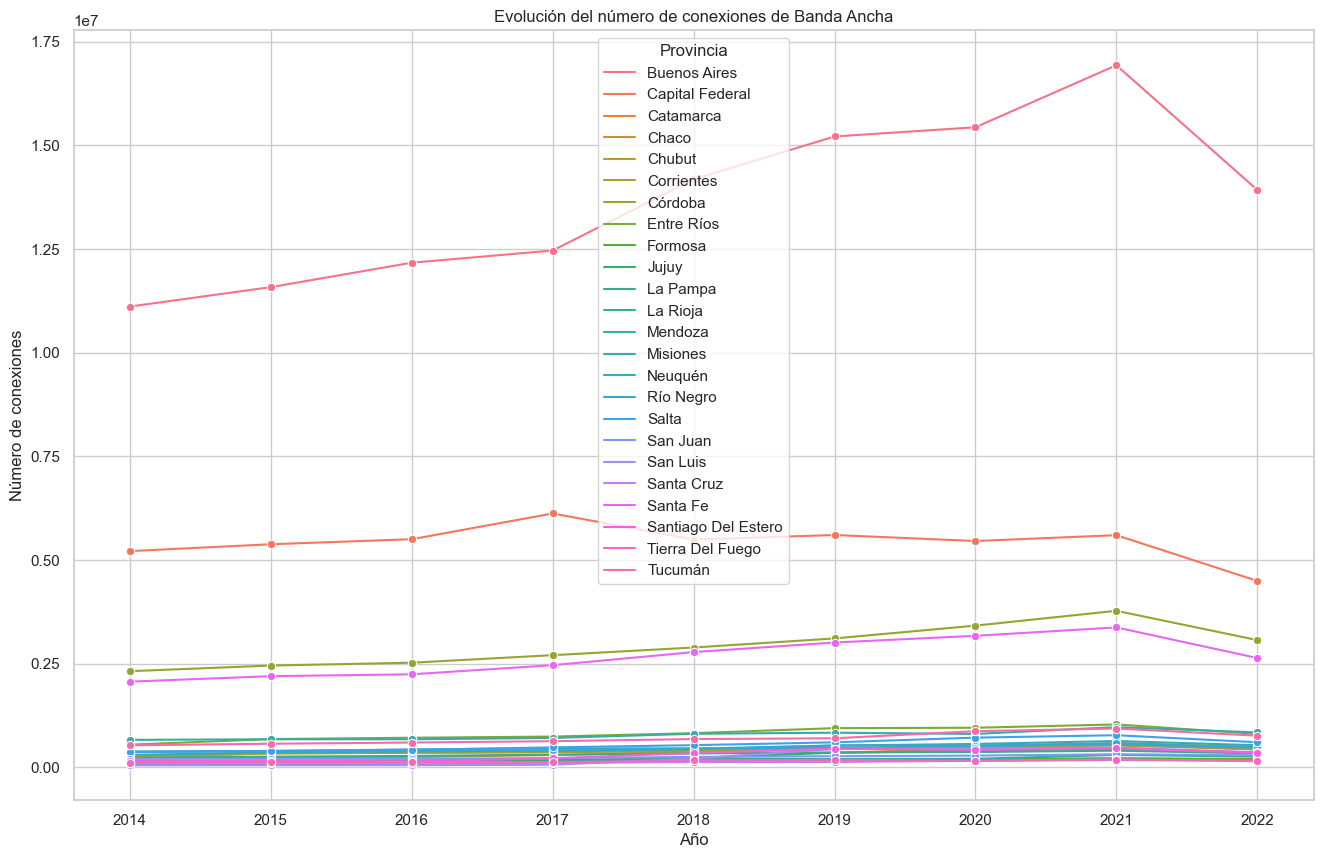

In [138]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

df1_año = df1.groupby(['Provincia','Año']).sum().drop(columns=['Trimestre'])

ax1 = sns.lineplot(x='Año', y='Banda ancha fija', hue='Provincia', data=df1_año, marker='o')

plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones de Banda Ancha')

plt.show()

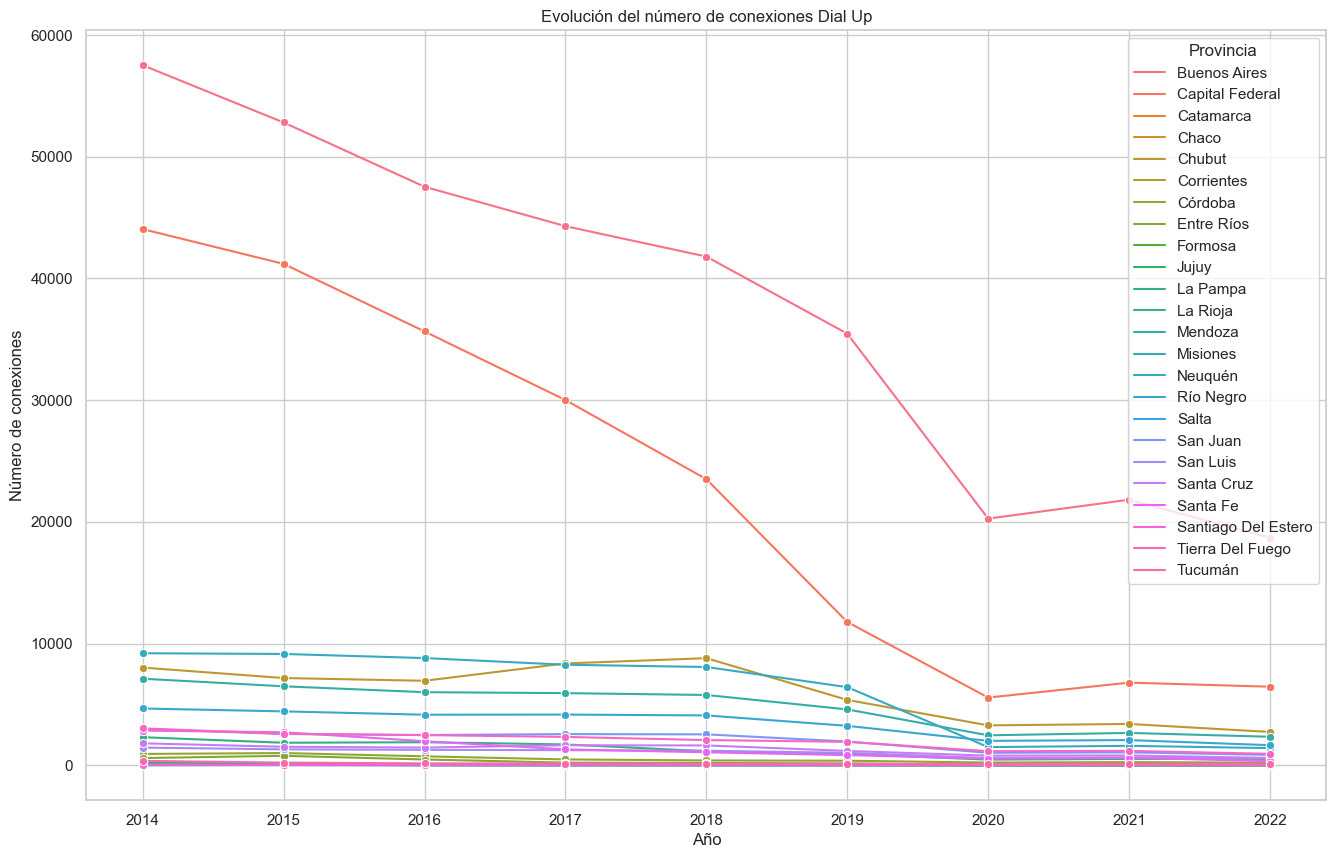

In [139]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

df1_año = df1.groupby(['Provincia','Año']).sum().drop(columns=['Trimestre'])

ax1 = sns.lineplot(x='Año', y='Dial up', hue='Provincia', data=df1_año, marker='o')

plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Dial Up')

plt.show()

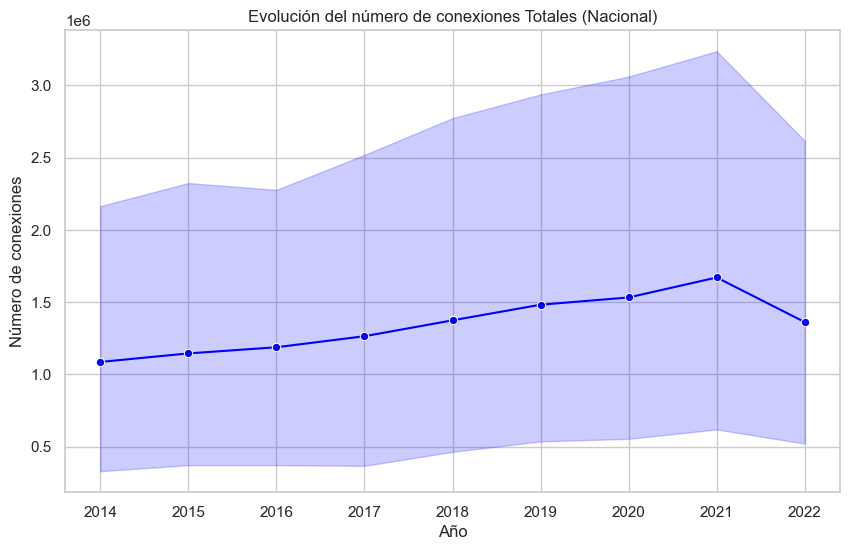

In [140]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Año', y='Total', color='blue', data=df1_año, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Totales (Nacional)')

plt.show()

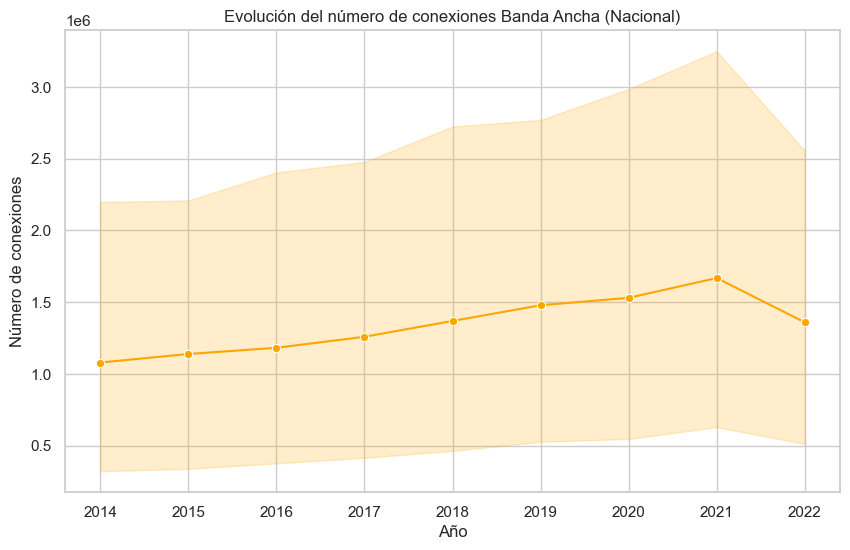

In [141]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Año', y='Banda ancha fija', color='orange', data=df1_año, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Banda Ancha (Nacional)')

plt.show()


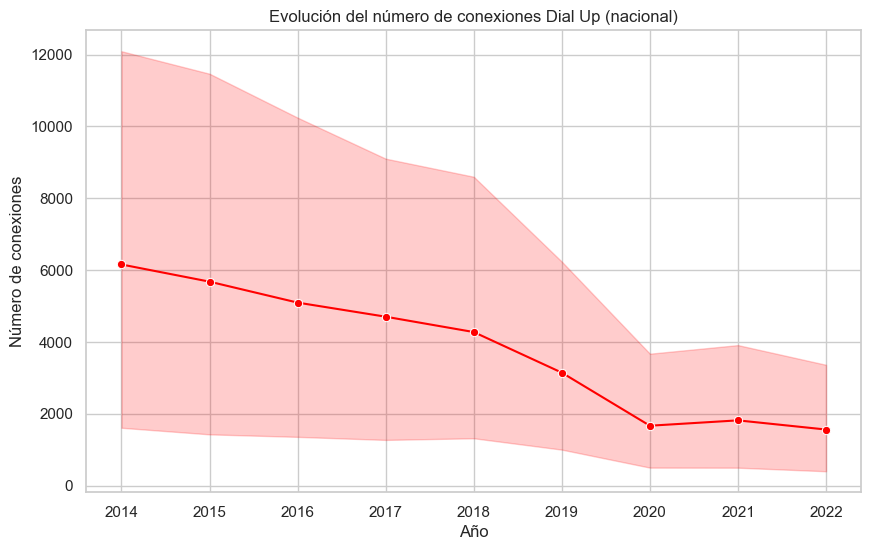

In [142]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Año', y='Dial up', color='red', data=df1_año, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Dial Up (nacional)')

plt.show()

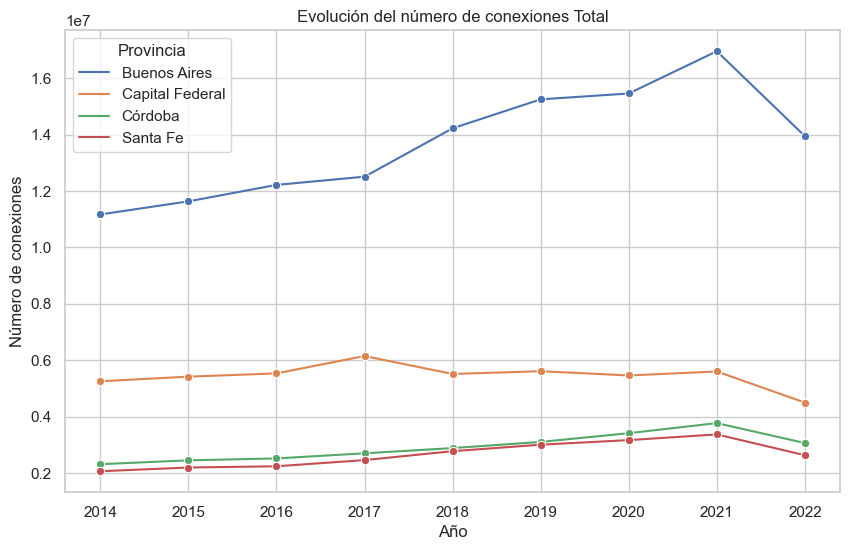

In [143]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))

provincias = ['Córdoba', 'Santa Fe', 'Capital Federal', 'Buenos Aires']

dfaux = df1[df1['Provincia'].isin(provincias)]
dfaux = dfaux.groupby(['Provincia','Año']).sum().drop(columns=['Trimestre'])

sns.lineplot(x='Año', y='Total', color='blue', hue= 'Provincia',data=dfaux, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Total')

plt.show()

Se puede ver como las lineas *Dial up* han entrado en desuso, disminuyendo su uso a través de los años. En cuanto las lineas de tipo *Banda ancha* continúan en aumento. Es sucede a nivel pais, independientemente de las provincias, lo que va de la mano con lo dicho anteriormente. Además se destaca en el acceso a servicios Buenos Aires, Capital Federal seguidos por Córdoba y Santa Fe.

## Archivo  --> **accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.csv**

In [114]:
diccio_nombres['df2']

'accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.csv'

In [115]:
df2 = pd.read_csv('./datastreams/' + diccio_nombres['df2'])
df2.head()

Año  Trimestre        Provincia  Otros  0,256 Mbps  0,375 Mbps  \
0  2022          1     Buenos Aires  26280          19           0   
1  2022          1  Capital Federal   1717          31           0   
2  2022          1        Catamarca   2207           0           0   
3  2022          1            Chaco   7580           0         225   
4  2022          1           Chubut  15607           8           0   

   0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  70 Mbps  71 Mbps  \
0           0     31380         192       5958  ...     3163        0   
1           0       461          35       1407  ...        3        0   
2           0        34          37          0  ...        0        0   
3         111       234           2          0  ...        0        0   
4           0        73          32       1069  ...        0        0   

   75 Mbps  77 Mbps  78 Mbps  80 Mbps  81 Mbps  83 Mbps  82 Mbps  86 Mbps  
0   100884        0        4      212        0        2        0        0  
1    31684        0        0        8        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 97 columns]

In [117]:
df2.eq(0).sum().sort_values().head(20).head(17)

Año           0
Trimestre     0
Provincia     0
0,5 Mbps      0
10 Mbps       0
6 Mbps        0
3 Mbps        0
1 Mbps        1
30 Mbps       7
20 Mbps      12
5 Mbps       23
15 Mbps      30
12 Mbps      38
2 Mbps       38
50 Mbps      41
4 Mbps       54
25 Mbps      69
dtype: int64

In [118]:
columnas_interes = df2.eq(0).sum().sort_values().head(20).head(17).index.values.tolist()

In [119]:
df2_años = df2[columnas_interes].groupby(['Año']).sum().reset_index().drop( columns = ['Provincia','Trimestre'])

In [120]:
df2_años_stacked = df2_años.set_index('Año').stack().reset_index()
df2_años_stacked.columns = ['Año', 'Velocidad', 'Número de accesos']


In [123]:
df2_años_stacked

Año Velocidad  Número de accesos
0   2017  0,5 Mbps              15041
1   2017   10 Mbps             889192
2   2017    6 Mbps            3053425
3   2017    3 Mbps              68073
4   2017    1 Mbps             157994
..   ...       ...                ...
79  2022   12 Mbps             231699
80  2022    2 Mbps              96773
81  2022   50 Mbps            2447829
82  2022    4 Mbps              74603
83  2022   25 Mbps             302769

[84 rows x 3 columns]

In [124]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df2_años_stacked.groupby('Velocidad')['Número de accesos'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_velocidades = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df2_años_stacked['Velocidad'] = pd.Categorical(df2_años_stacked['Velocidad'], categories=sorted_velocidades, ordered=True)

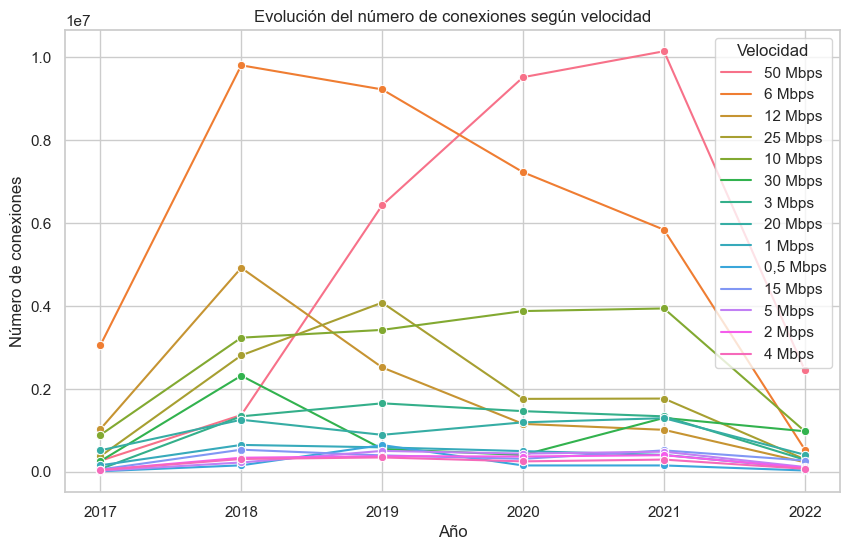

In [125]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='Número de accesos', hue='Velocidad', color='pink', data=df2_años_stacked, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones según velocidad')

plt.show()

In [122]:
df2_años_stacked.sort_values(by = 'Número de accesos', ascending = False)['Velocidad'].unique()

array(['50 Mbps', '6 Mbps', '12 Mbps', '25 Mbps', '10 Mbps', '30 Mbps',
       '3 Mbps', '20 Mbps', '1 Mbps', '0,5 Mbps', '15 Mbps', '5 Mbps',
       '2 Mbps', '4 Mbps'], dtype=object)

Se puede observar que a nivel nacional se puede observar una tendencia de aumento de conexiones de mayor velocidad, predominando los 50 MB/S. A la vez que las conexiones de menor velocidad tienden a disminuir su cantidad, se podría decir que son reemplazadas por conexiones de mayor velocidad. Este análisis se hizo para verificar aquellas conexiones más empleadas, es decir, con menos valores nulos o 0, sin embargo dicha información esta resumida en rangos en otro de los *dataframe*. Es altamente probable que se opte por el uso de la *data* resumida. 

Otro punto observable a destacar es la aparente caida de usuarios, sin embargo esto no es así, simplemente que estos se mudaron a velocidades mayores.

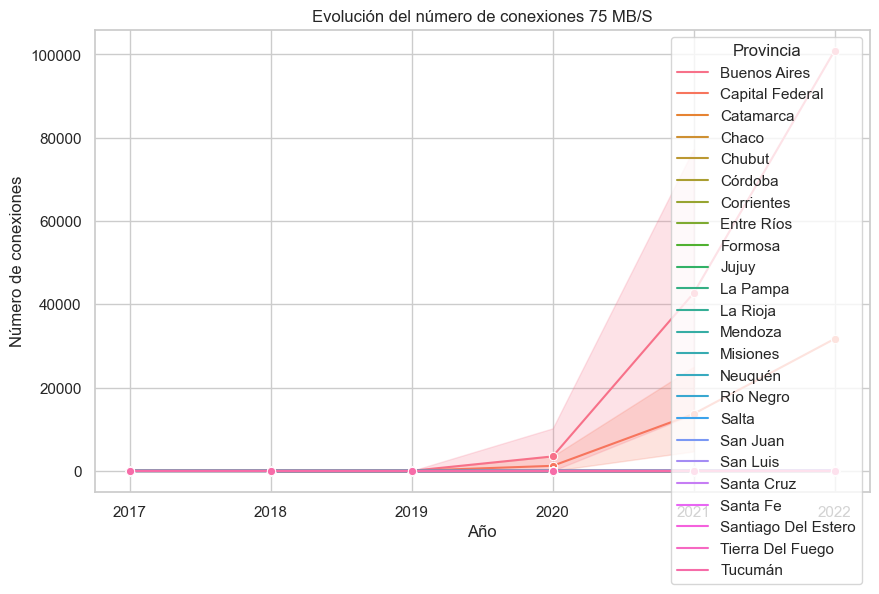

In [133]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y= '75 Mbps', hue = 'Provincia', color='pink', data=df2, marker='o')

plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones 75 MB/S')

plt.show()

A modo de ejemplificar, se muestra como se elevan las conexiones de mayores velocidades.

## Archivo  --> **acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.csv**

In [8]:
diccio_nombres['df3']

'acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.csv'

In [13]:
df3 = pd.read_csv('./datastreams/' + diccio_nombres['df3'])
df3.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2022          3     Buenos Aires           29985                27709   
1  2022          3  Capital Federal             517                 5742   
2  2022          3        Catamarca              71                  384   
3  2022          3            Chaco             461                  987   
4  2022          3           Chubut             109                 1444   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0             290315              297915               267044   
1              34371               67829                51946   
2               3107                5389                 5099   
3              16782               18938                 8049   
4              45707               30940                34682   

   + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS    Total  
0               124190    3618689   65821  4721668  
1                28692    1253105  105477  1547679  
2                 3737      50298    2208    70293  
3                15828      79390    3711   144146  
4                15309      17563   20024   165778

In [14]:
df3.drop(columns='Total', inplace=True)

In [15]:
# Generación de variable categorica para mejor manejo de variables
df3_melt = df3.melt(id_vars = ['Año', 'Trimestre', 'Provincia'], var_name = 'tipo_velocidad', value_name = "total").sort_values(by = ['Año', 'Trimestre', 'Provincia']).reset_index(drop=True)

In [16]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df3_melt.groupby('tipo_velocidad')['total'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_velocidades = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df3_melt['tipo_velocidad'] = pd.Categorical(df3_melt['tipo_velocidad'], categories=sorted_velocidades, ordered=True)


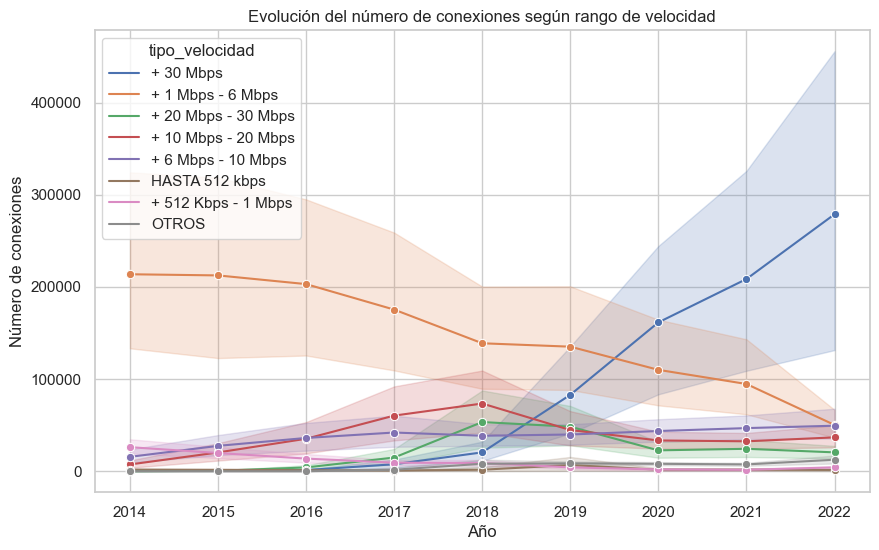

In [23]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='total', hue='tipo_velocidad', color='pink', data=df3_melt, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones según rango de velocidad')

plt.show()



Como se observo en los gráficos previos, se nota una disminución en las conexiones de baja velocidad a la vez que un aumento en las redes de mayor velocidad. Esto se correlaciona con la información del *datframe* anteriore, donde la velocidad destacada era 50 MB. que en este caso se refleja en la de mayores a 30. A su vez se vuelve a notar la tendencia al desuso de velocidades más lentas, menores a 6 MB/s

### Visualizando el uso de redes mayores a 30 MB/S según provincia

In [72]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df3.groupby('Provincia')['+ 30 Mbps'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df3['Provincia'] = pd.Categorical(df3['Provincia'], categories=sorted_provincias, ordered=True)


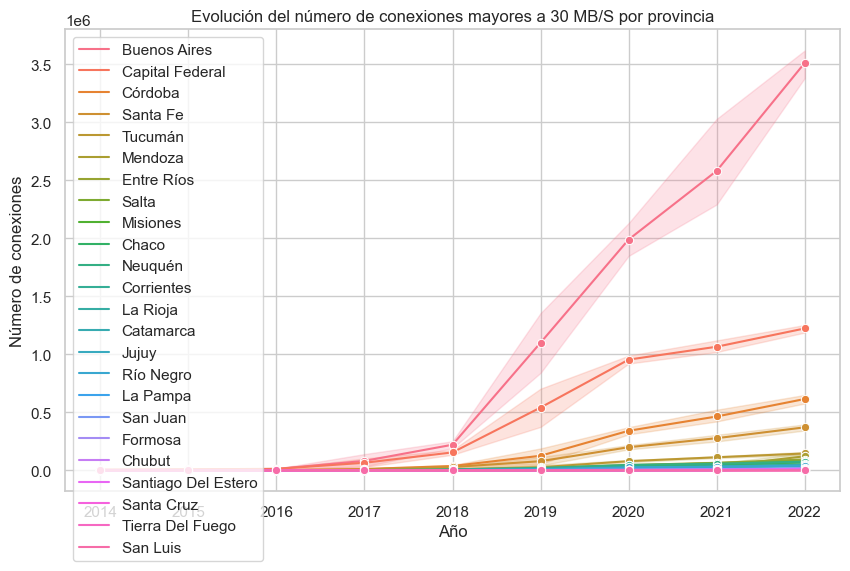

In [73]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='+ 30 Mbps', hue='Provincia', color='orange', data=df3, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones mayores a 30 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Como se esperaba, las provincias con mayor cantidad de conexión se concentra en Buenos Aires y Capital Federal. A estas les siguen las siguiente ciudades más grandes y concentradas del país, notándose seguidas, por arriba del resto, Santa Fe y Córdoba.

### Visualizando el uso de redes + 1 MB/S - 6 MB/S según provincia

In [77]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df3.groupby('Provincia')['+ 1 Mbps - 6 Mbps'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df3['Provincia'] = pd.Categorical(df3['Provincia'], categories=sorted_provincias, ordered=True)


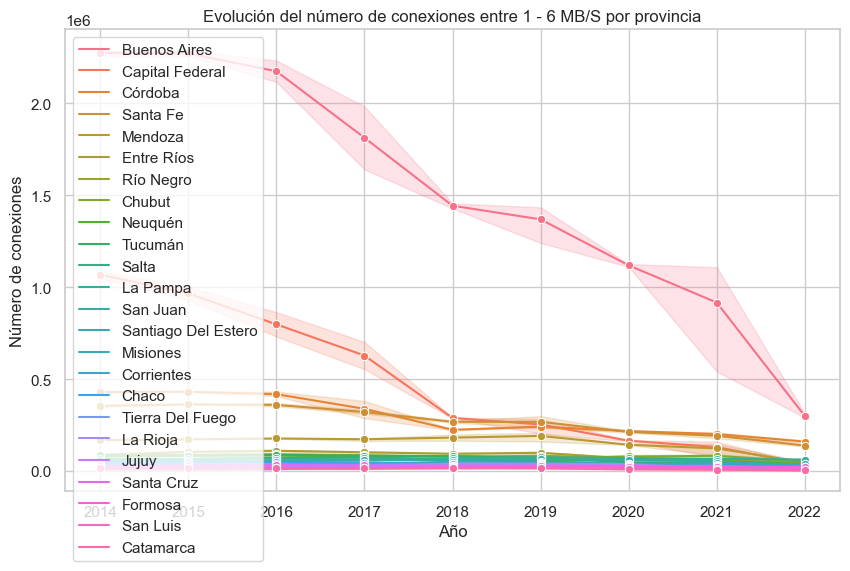

In [78]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='+ 1 Mbps - 6 Mbps', hue='Provincia', color='orange', data=df3, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones entre 1 - 6 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

### Visualizando el uso de redes + 6 MB/S - 10 MB/S según provincia

In [85]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df3.groupby('Provincia')['+ 6 Mbps - 10 Mbps'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df3['Provincia'] = pd.Categorical(df3['Provincia'], categories=sorted_provincias, ordered=True)

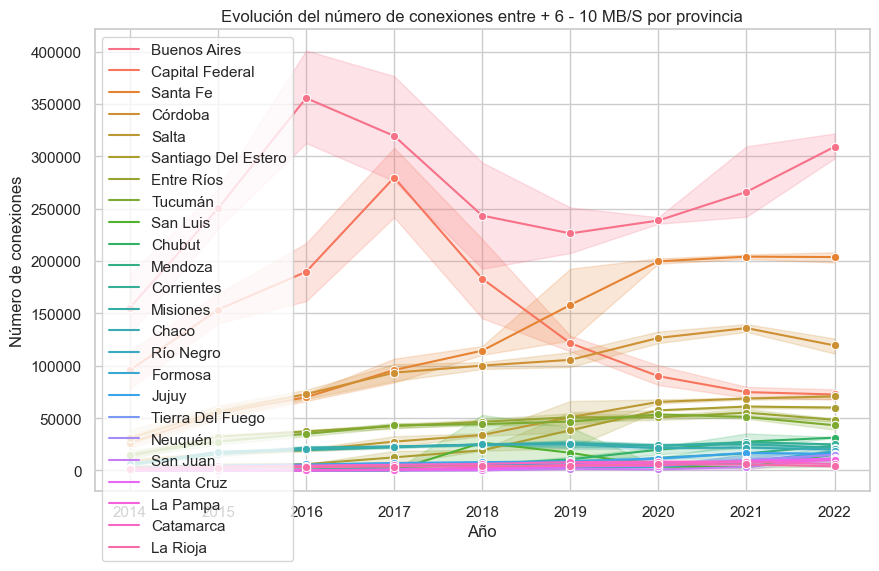

In [86]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='+ 6 Mbps - 10 Mbps', hue='Provincia', color='orange', data=df3, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones entre + 6 - 10 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

### Visualizando el uso de redes + 10 Mbps - 20 MB/S según provincia

In [81]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df3.groupby('Provincia')['+ 10 Mbps - 20 Mbps'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df3['Provincia'] = pd.Categorical(df3['Provincia'], categories=sorted_provincias, ordered=True)

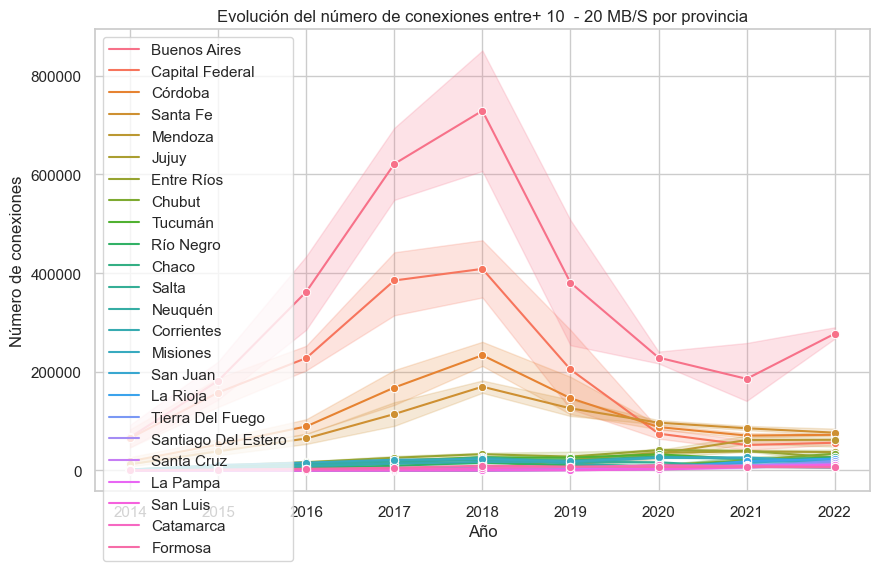

In [83]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='+ 10 Mbps - 20 Mbps', hue='Provincia', color='orange', data=df3, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones entre+ 10  - 20 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

### Visualizando el uso de redes + 20 Mbps - 30 MB/S según provincia

In [87]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df3.groupby('Provincia')['+ 20 Mbps - 30 Mbps'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df3['Provincia'] = pd.Categorical(df3['Provincia'], categories=sorted_provincias, ordered=True)

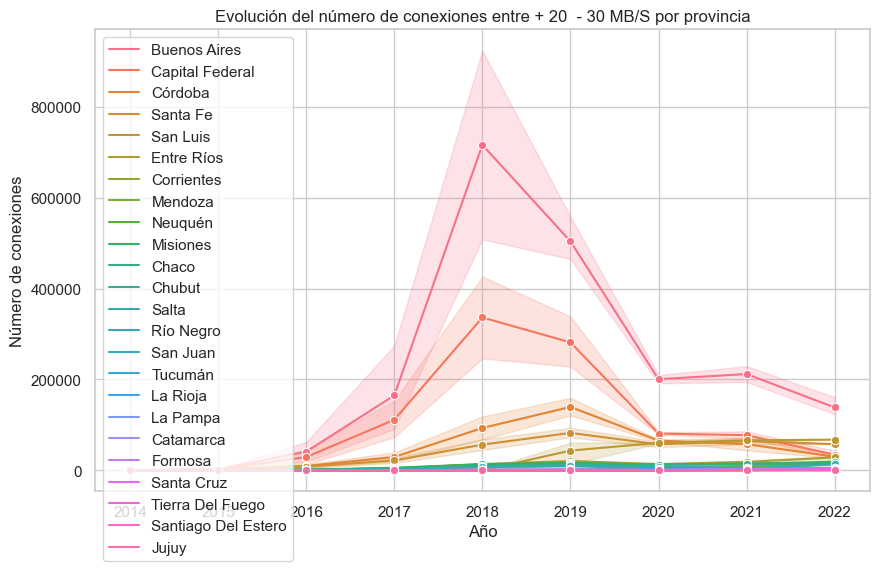

In [89]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='+ 20 Mbps - 30 Mbps', hue='Provincia', color='orange', data=df3, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones entre + 20  - 30 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

#### **Observando las velocidades segun provincia por separado se puede observar como el pico de crecimiento en las conexiones mayores a 30 MB/S coinciden con los picos de desuso en las redes de velocidades más pequeñas (año 2018)**

#### **Sin embargo esto es para las redes mayores a 10 MB/S, en cuanto al rango 6-10 se observa decaimiento desde el año 2017 pero posteriormente se mantiene relativamente estable en cuanto a conexiones, lo que destaca quizás un sector de usuarios que se ven conformes con este servicio. Sin embargo, observando las dimensiones de los datos, estos valores son bajos en comparación a los usuarios de las redes de mayor velocidad**

#### **Por último, para velocidades menores a 6 MB/S el desuso siempre se mantiene en aumento**

### **Otro punto que se destaca es que solo las redes mayores a 30 mantienen su aumento sin observar picos de decaimiento como el resto de las velocidades (menores a esta), lo que apunta a la fuerte tendencia de la mejora del servicio en torno a velocidades**

## Archivo --> **acceso_a_internet_fijo_por_tecnologia_y_provincia.csv**

In [86]:
diccio_nombres['df4']

'acceso_a_internet_fijo_por_tecnologia_y_provincia.csv'

In [102]:
df4 = pd.read_csv('./datastreams/' + diccio_nombres['df4'])
df4.head()

Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2022          3     Buenos Aires  339648     2748325       1436433   
1  2022          3  Capital Federal  140791     1240125        129218   
2  2022          3        Catamarca   10010       10495         46224   
3  2022          3            Chaco   27164       61800         44645   
4  2022          3           Chubut   45377       72212          9574   

   Wireless  Otros    Total  
0    126846  70416  4721668  
1      5758  31787  1547679  
2      1329   2235    70293  
3      8178   2359   144146  
4     29784   8831   165778

In [119]:
df4.describe()

Año   Trimestre          ADSL    Cablemodem  Fibra óptica  \
count   840.000000  840.000000  8.400000e+02  8.400000e+02  8.400000e+02   
mean   2017.885714    2.457143  1.275668e+05  1.717750e+05  2.991186e+04   
std       2.528745    1.105009  2.550543e+05  4.221661e+05  1.235013e+05   
min    2014.000000    1.000000  6.842000e+03  0.000000e+00  0.000000e+00   
25%    2016.000000    1.000000  2.247925e+04  8.599750e+03  1.860000e+02   
50%    2018.000000    2.000000  4.859600e+04  3.498400e+04  1.093000e+03   
75%    2020.000000    3.000000  1.045695e+05  7.074850e+04  1.386250e+04   
max    2022.000000    4.000000  1.586343e+06  2.748325e+06  1.436433e+06   

            Wireless         Otros         Total  
count     840.000000    840.000000  8.400000e+02  
mean    10345.001190   6142.961905  3.457417e+05  
std     18192.024086  10572.152928  7.419436e+05  
min         0.000000      2.000000  1.255700e+04  
25%       253.000000    307.250000  5.202975e+04  
50%      4261.500000   1852.000000  1.034895e+05  
75%     12435.000000   6915.500000  1.779148e+05  
max    126887.000000  73415.000000  4.721668e+06

Se puede observar a primera escala que el rango de uso de las tecnologías más modernas ronda de 0 hasta grandes números, indicando esto que algunas provincias no cuentan con dichas tecnologías.

### Panorama Nacional

In [120]:
# Generación de variable categorica para mejor manejo de variables
df4_melt = df4.drop(columns=['Total']).melt(id_vars = ['Año', 'Trimestre', 'Provincia'], var_name = 'tipo_tecnologia', value_name = "total").sort_values(by = ['Año', 'Trimestre', 'Provincia']).reset_index(drop=True)

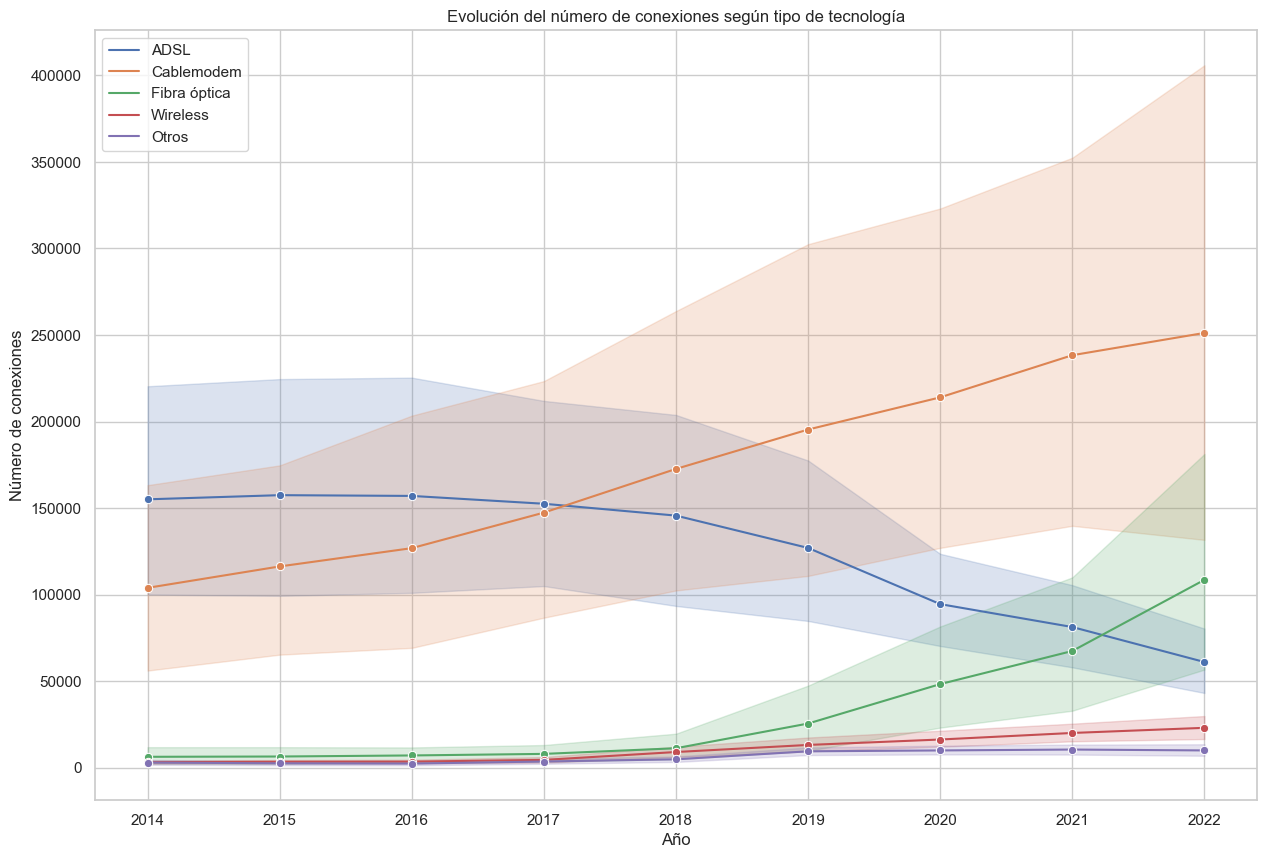

In [121]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='total', hue='tipo_tecnologia', color='pink', data=df4_melt, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones según tipo de tecnología')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

En panorama nacional se observa un aumento de las conexiones vía **cablemodem** y **Fibra óptica** a la vez que una disminución del uso de tecnologías tipo **ADSL**. Esto va de la mano con lo mencionado en las gráficas de velocidades, debido a que:
| **Tecnología**  | **Velocidad (MB/S)**        |
| --------------- | --------------------------- |
| ADSL            | 2-24                        |
| Cablemodem      | 10-1000                     |
| Fibra óptica    | 100-1000  o más             |
| Wireless        | 1-100                       |

Mencionado esto, se puede ver la clara correlación de las velocidades y su evolución en las conexiones con la evolución de las conexiones según tecnología. A su vez, algo a destacar es la amplitud de crecimiento, como se puede observar en las sombras generadas por los trimestres, indicando la mayor dispersión un mayor aumento según trimestres.

Text(0, 0.5, 'Valores')

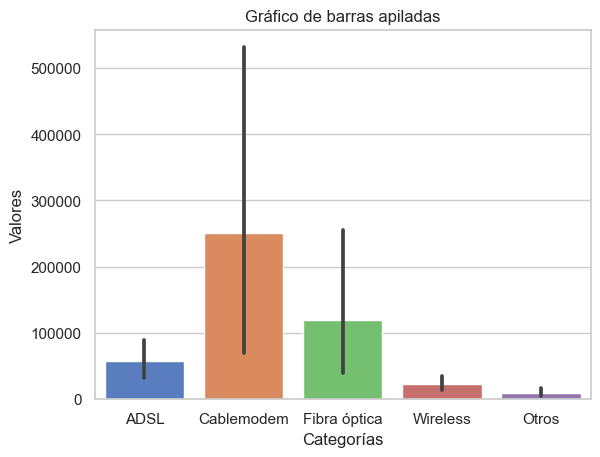

In [104]:
mascara = (df4['Año'] == 2022) & (df4['Trimestre'] == 3)
nacional_2022 = df4[mascara]
nacional_2022 = nacional_2022.drop(columns = ['Año', 'Trimestre', 'Total'])
# Crear el gráfico de barras apiladas
sns.set(style="whitegrid")
sns.barplot(data=nacional_2022, palette="muted")

# Personalizar el gráfico
plt.title("Gráfico de barras apiladas")
plt.xlabel("Categorías")
plt.ylabel("Valores")

En términos generales , tal como se observa en los otros gráficos, el uso de cable módem se destaca por sobre el resto, siguiéndole Fibra óptica. Destacando la tendencia nacional al aumento de velocidades.

### Panorama general provincial

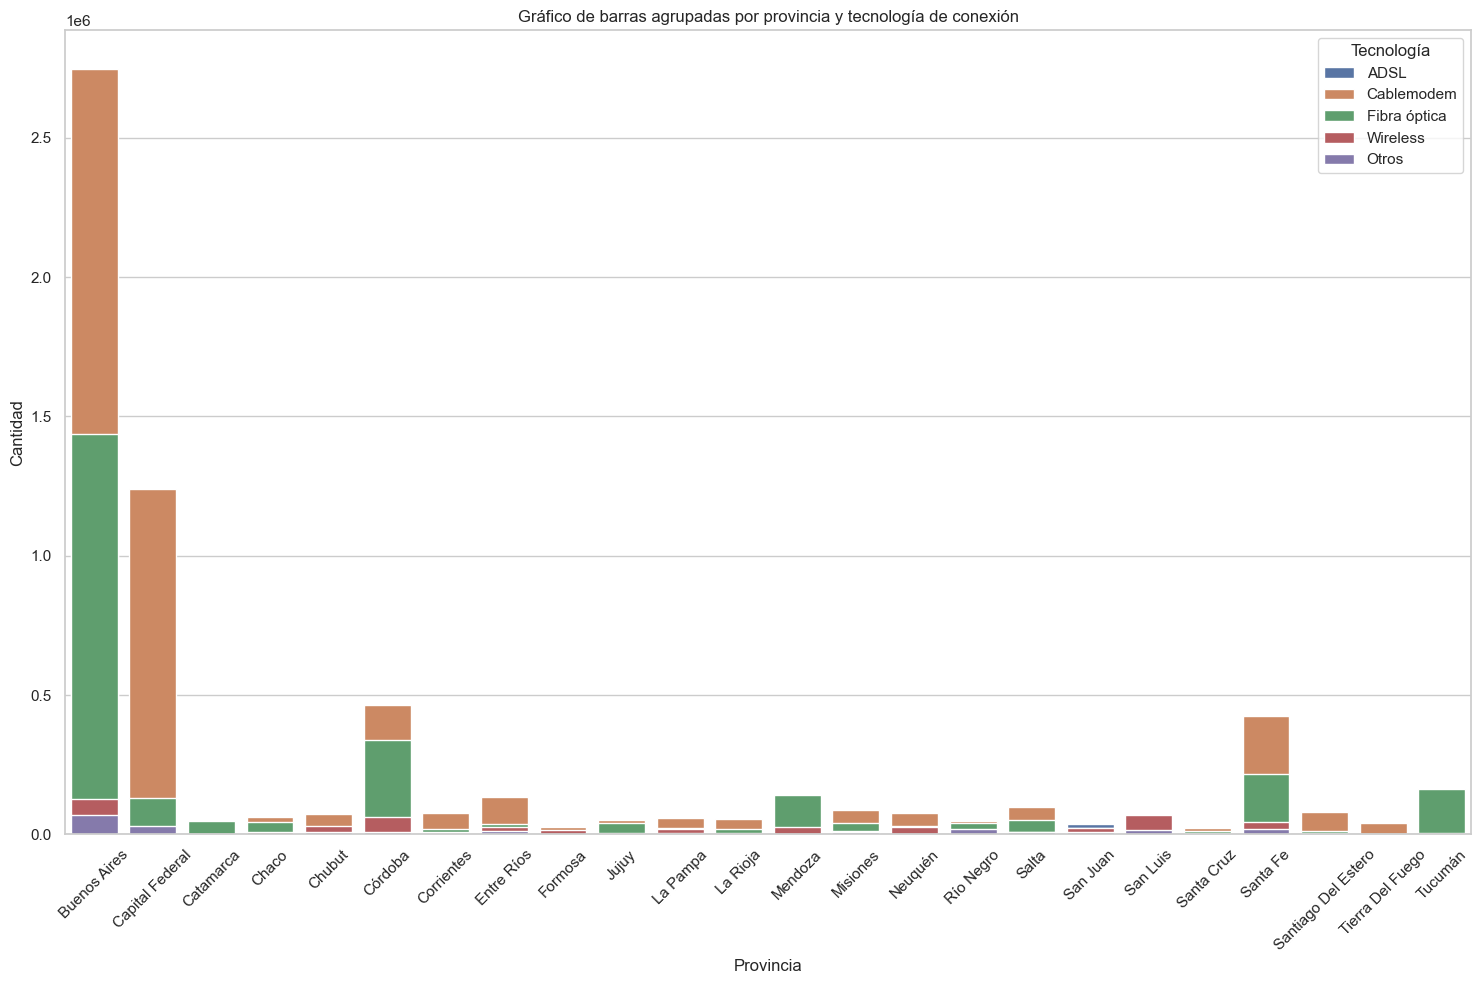

In [111]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

nacional_2022_melt = pd.melt(nacional_2022, id_vars='Provincia', var_name='Tecnología', value_name='Cantidad')

sns.barplot(x='Provincia', y='Cantidad', hue='Tecnología', data=nacional_2022_melt, dodge=False)

plt.title('Gráfico de barras agrupadas por provincia y tecnología de conexión')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

A nivel provincia se observa de mejor manera el status de las tecnologías en las últimas mediciones. Se observa como destacan Buenos Aires, Capital Federal, Córdoba, Santa Fe y Mendoza, como se había mencionado previamente. A su vez se destaca que en Tucumán la Fibra Óptica es muy superior a las otras tecnologías a nivel provincial.

Y en términos generales, como se observo en el gráfico anterior se observa el uso de cable módem y Fibra Óptica por encima del resto de tecnologías, lo que corresponde a las velocidades medidas previamente.

### Observando **ADSL** según **provincias**

In [122]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df4.groupby('Provincia')['ADSL'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df4['Provincia'] = pd.Categorical(df4['Provincia'], categories=sorted_provincias, ordered=True)


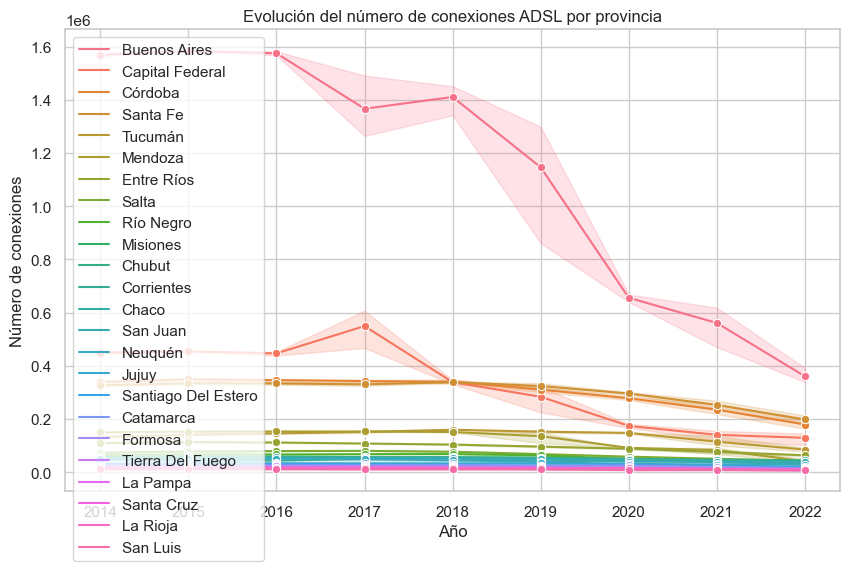

In [123]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='ADSL', hue='Provincia', color='orange', data=df4, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones ADSL por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

### Observando **cablemodem** según **provincias**


In [128]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df4.groupby('Provincia')['Cablemodem'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df4['Provincia'] = pd.Categorical(df4['Provincia'], categories=sorted_provincias, ordered=True)

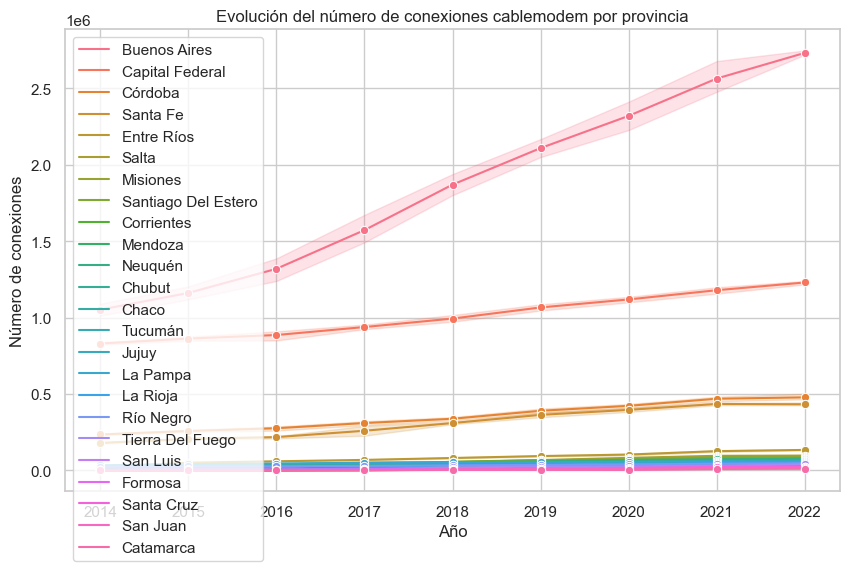

In [127]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='Cablemodem', hue='Provincia', color='orange', data=df4, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones cablemodem por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

### Observando **fibra óptica** según **provincias**


In [129]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df4.groupby('Provincia')['Fibra óptica'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df4['Provincia'] = pd.Categorical(df4['Provincia'], categories=sorted_provincias, ordered=True)

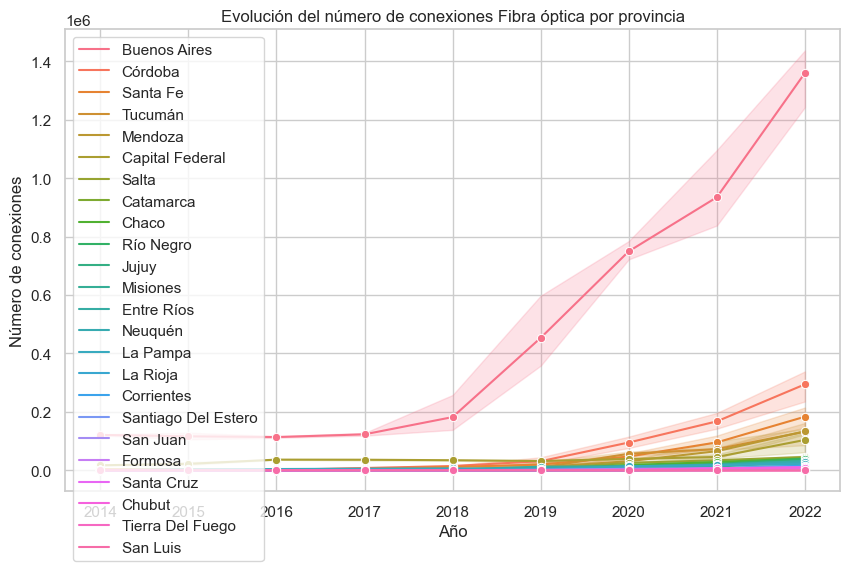

In [130]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='Fibra óptica', hue='Provincia', color='orange', data=df4, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Fibra óptica por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

### Observando **Wireless** según **provincias**


In [131]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df4.groupby('Provincia')['Wireless'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df4['Provincia'] = pd.Categorical(df4['Provincia'], categories=sorted_provincias, ordered=True)

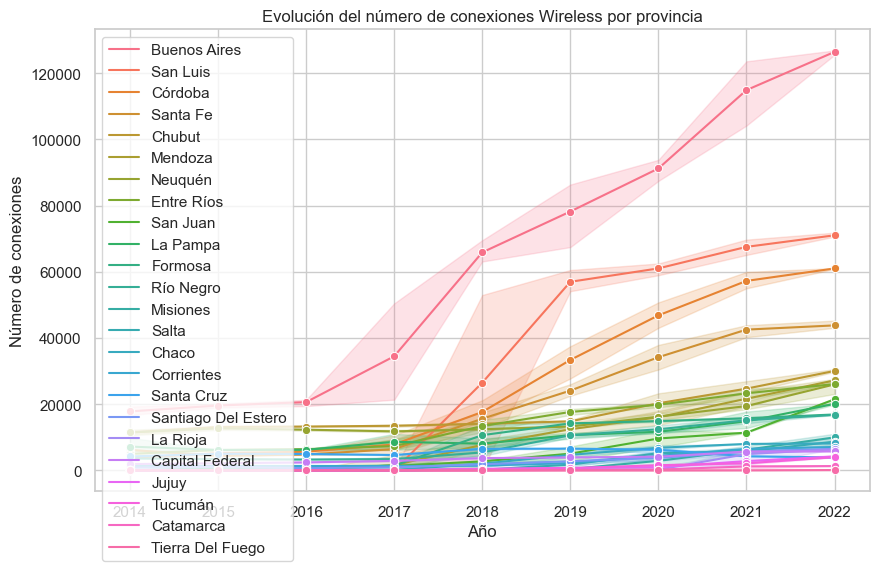

In [133]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='Wireless', hue='Provincia', color='orange', data=df4, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones Wireless por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

#### Observando las tecnologías según provincias, se puede observar como hay una clara tendencia a mejorar las tecnologías en torno a las velocidades. Nuevamente como en los puntos anteriores destacan las mismas provincias con ciudades más grandes y desarrolladas. Sin embargo se destaca la falta de infraestructura de tecnologías de tipo **Wireless** y **Fibra Óptica** en Capital Federal, punto a destacar como posible objetivo de despliegue.

### Sin embargo, pensando en la velocidad como marcador principal y en el número de usuarios, los números de **Wirless** son muy pequeños en comparación de los de **Cable Módem** y **Fibra Óptica**

### Además se observa el desuso de las tecnologías ADSL, lo que puede ir de la mano del desuso de lineas telefónicas fijas.

## Archivo --> **penetracion_del_internet_fijo_por_provincia_(accesos_por_cada_100_habitantes).csv**

In [134]:
diccio_nombres['df5']

'penetracion_del_internet_fijo_por_provincia_(accesos_por_cada_100_habitantes).csv'

In [135]:
df5 = pd.read_csv('./datastreams/' + diccio_nombres['df5'])
df5.head()

Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2022          3     Buenos Aires                        26
1  2022          3  Capital Federal                        50
2  2022          3        Catamarca                        17
3  2022          3            Chaco                        12
4  2022          3           Chubut                        26

In [137]:
df5.describe()

Año   Trimestre  Accesos por cada 100 hab
count   840.000000  840.000000                840.000000
mean   2017.885714    2.457143                 14.658333
std       2.528745    1.105009                  8.989528
min    2014.000000    1.000000                  3.000000
25%    2016.000000    1.000000                  8.000000
50%    2018.000000    2.000000                 13.000000
75%    2020.000000    3.000000                 19.000000
max    2022.000000    4.000000                 52.000000

A simple vista podemos destacar como existen provincias con un bajo indice de acceso, punto a tener en cuenta para objetivos de despliegue o de estrategias de venta.

### Observando la evolución y dispersión en función de provincias a nivel nacional

In [150]:
df5_nacional_1 = df5[df5['Trimestre'] == 3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


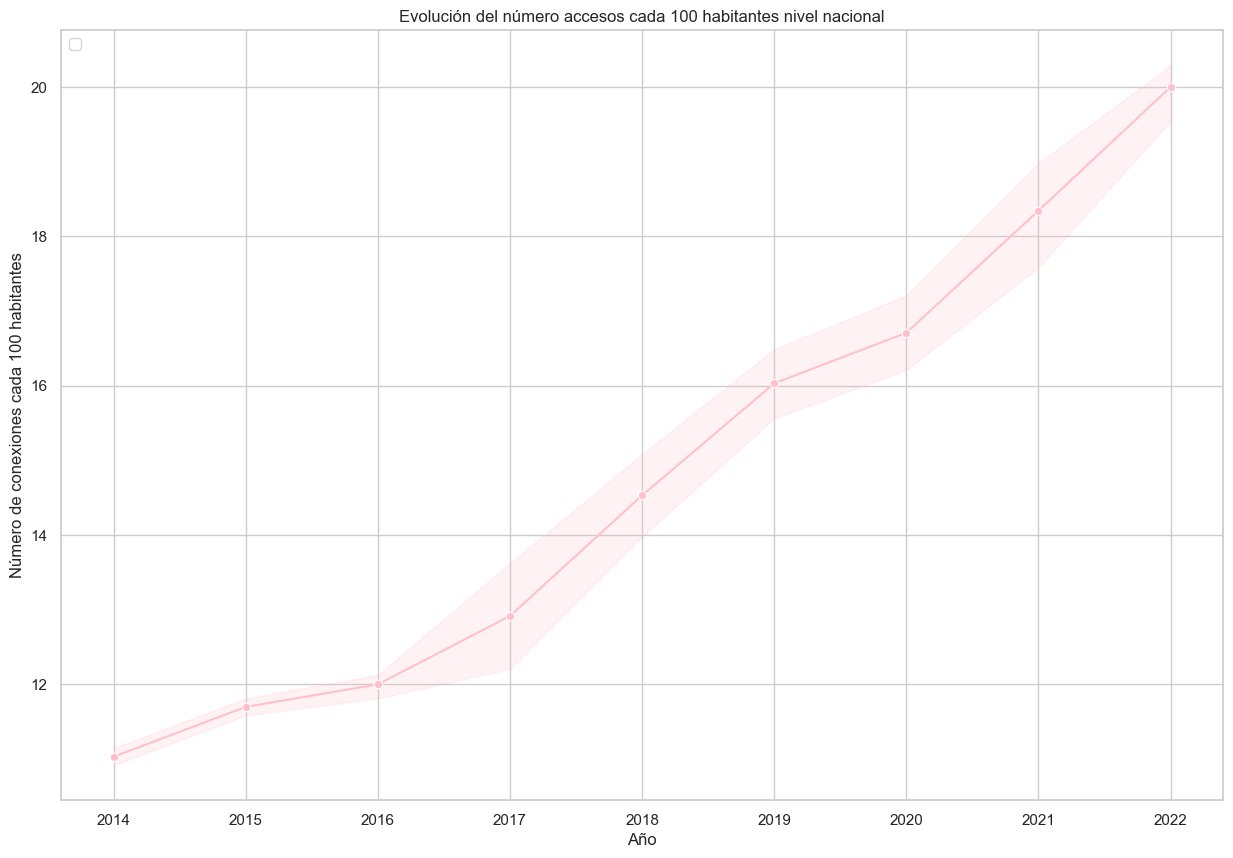

In [187]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Accesos por cada 100 hab', color='pink', data=df5_nacional_1, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 habitantes')
plt.title('Evolución del número accesos cada 100 habitantes nivel nacional')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Se puede observar que a nivel nacional hay una tendencia de aumento en cuanto al acceso cada 100 habitantes, a la vez que se observa una amplia dispersión de valores, en torno a las diferentes provincias

### Observando la evolución y dispersión en función de trimestres a nivel nacional

In [157]:
df5_nacional_2 = df5[['Año', 'Trimestre', 'Accesos por cada 100 hab']].groupby(['Año', 'Trimestre']).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


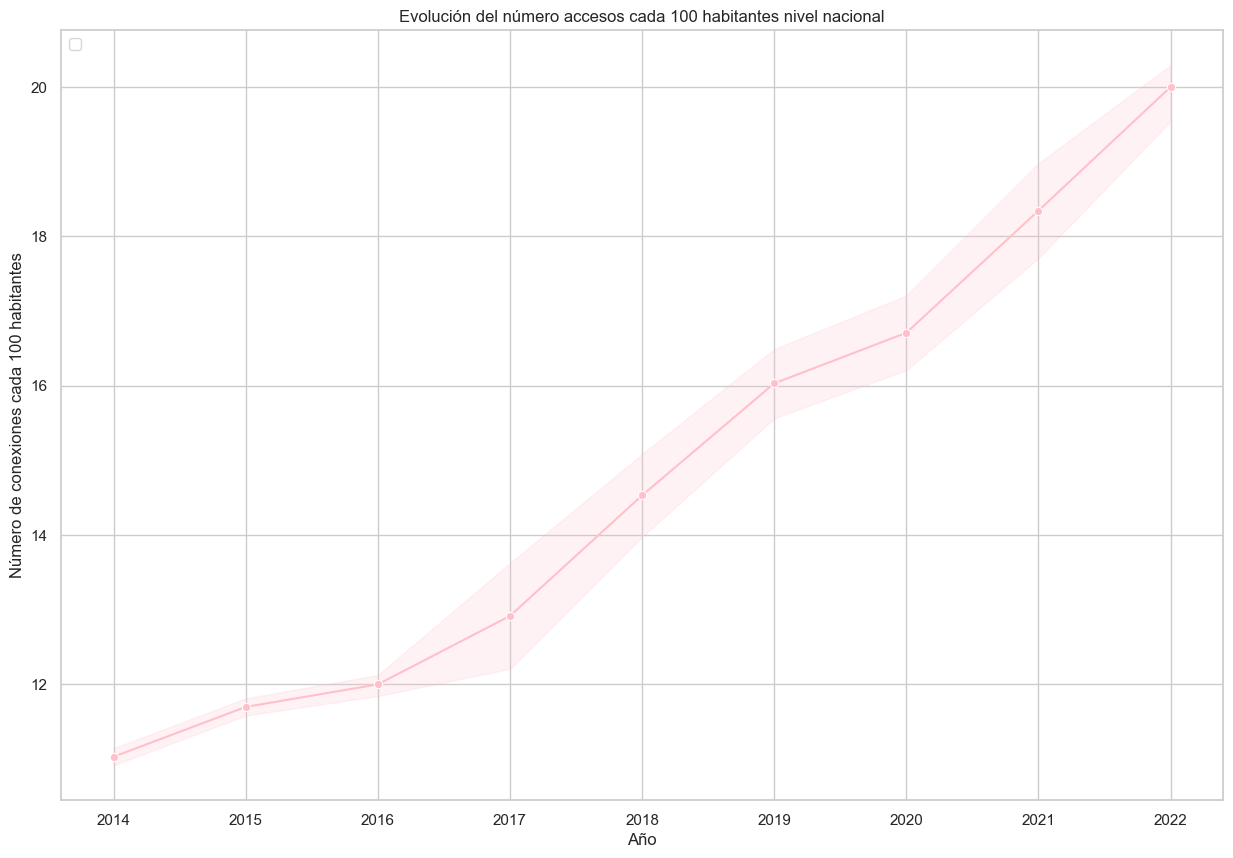

In [186]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Accesos por cada 100 hab', color='pink', data=df5_nacional_2, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 habitantes')
plt.title('Evolución del número accesos cada 100 habitantes nivel nacional')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Este gráfico refleja la dispersión de valores según trimestre, ignorando las provincias, a diferencia del anteriore que reflejaba la dispersión en función de los valores por provincias.

### Observando las evolución en función de provincias

In [139]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df5.groupby('Provincia')['Accesos por cada 100 hab'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df5['Provincia'] = pd.Categorical(df5['Provincia'], categories=sorted_provincias, ordered=True)

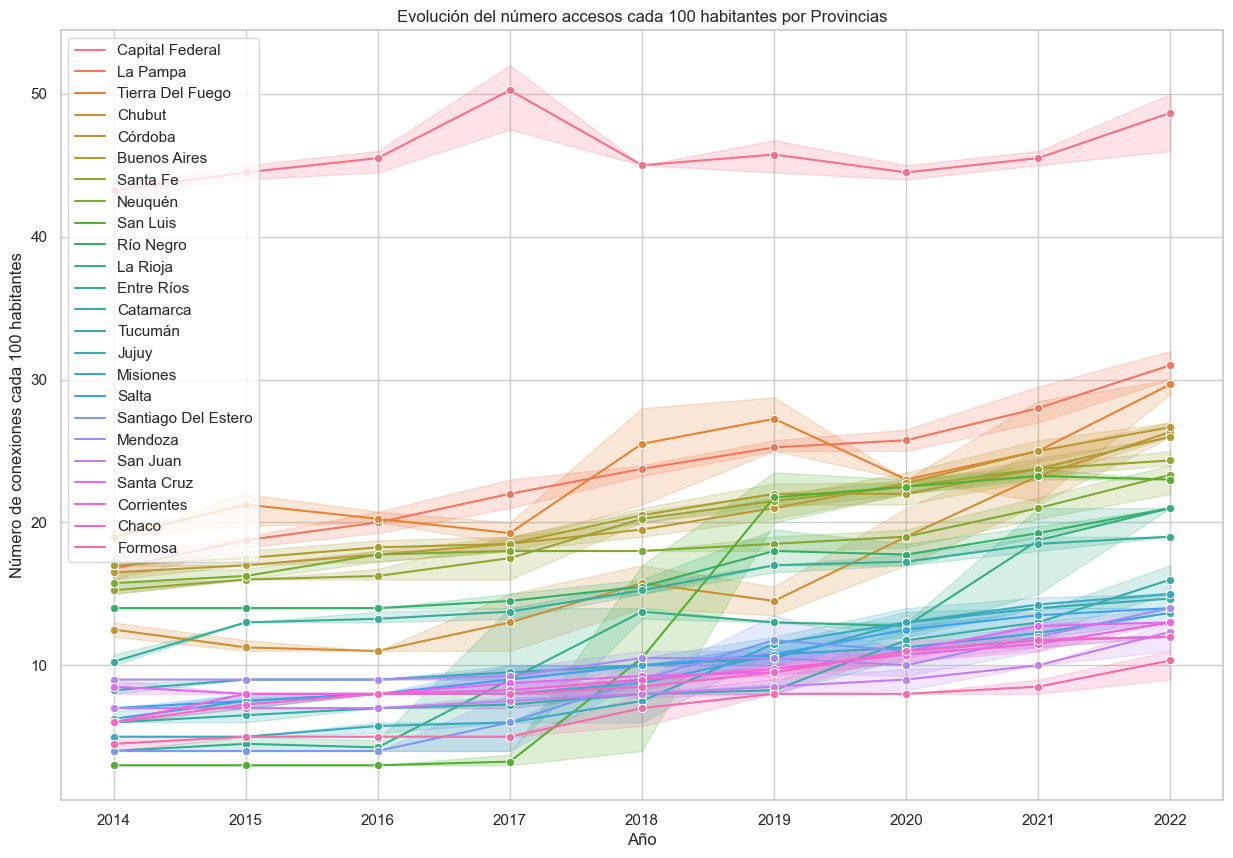

In [185]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Accesos por cada 100 hab', hue='Provincia', color='pink', data=df5, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 habitantes')
plt.title('Evolución del número accesos cada 100 habitantes por Provincias')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Estos datos pueden resultar un tanto engorrosos dada la diferencia de habitantes entre provincias, el claro ejemplo de esto es la aparición de La Pampa debajo de Capital Federal, lo que se debe a la diferencia de cifras demográficas y obviamente a la densidad de población. A su vez que estos valores se ven afectados por el nivel de desarrollo de las provincias.

La Pampa: 353 440 Habitantes // Capital Federal: 3 120 612 habitantes

Sin embargo, a pesar de esto podemos observar que si bien existe un aumento, el acceso cada 100 personas se mantiene relativamente estable, aunque para obtener mejores conclusiones deberíamos observar el crecimiento de las poblaciones.

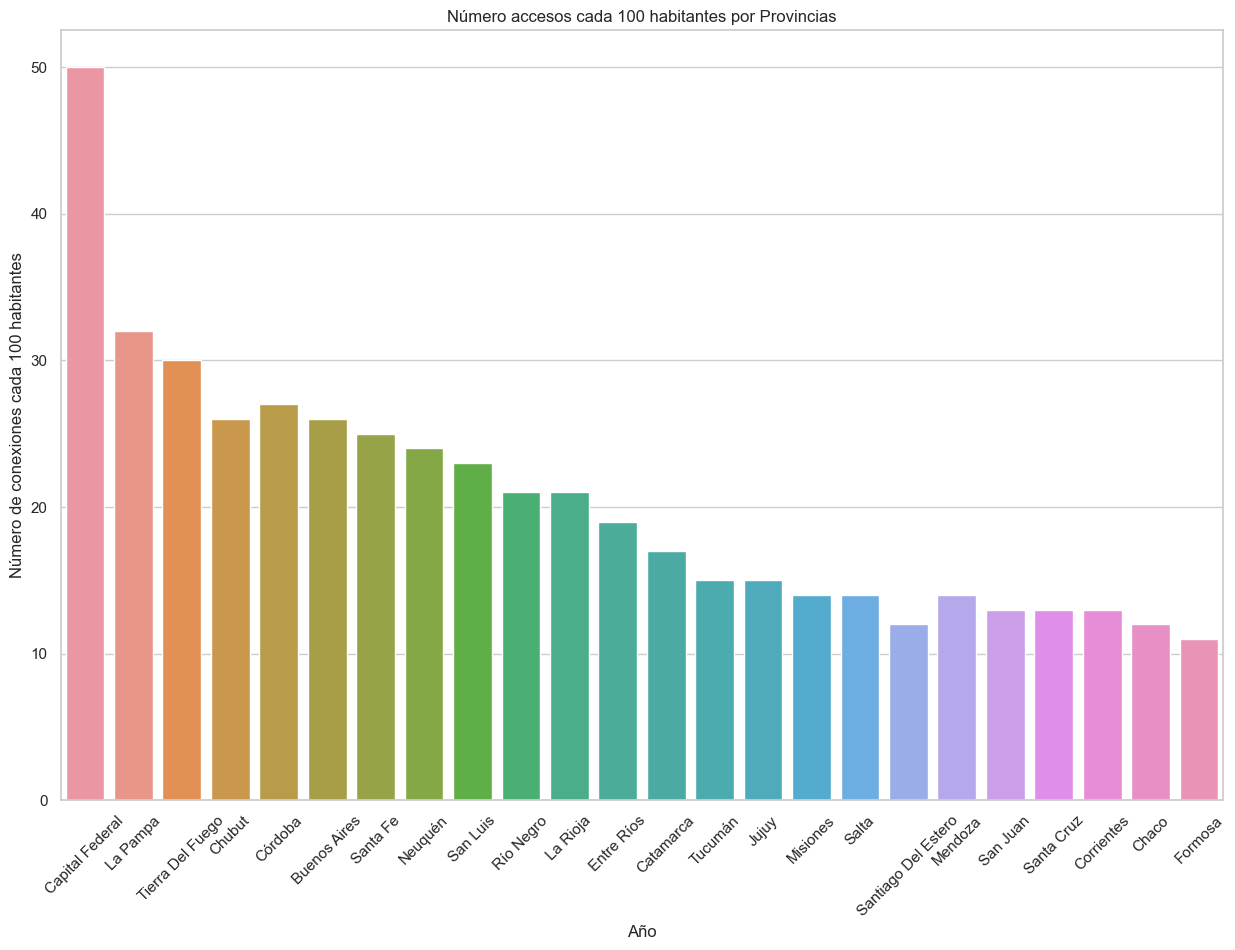

In [184]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

df5_bar = df5[(df5['Trimestre'] == 3) & (df5['Año'] == 2022)]
sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=df5_bar)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 habitantes')
plt.title('Número accesos cada 100 habitantes por Provincias')
plt.xticks(rotation=45)

plt.show()

## Archivo --> **penetracion_del_internet_fijo_por_provincia_(accesos_por_cada_100_hogares).csv**

In [189]:
diccio_nombres['df6']

'penetracion_del_internet_fijo_por_provincia_(accesos_por_cada_100_hogares).csv'

In [44]:
df6 = pd.read_csv('./datastreams/' + diccio_nombres['df6'])
df6.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2022          3     Buenos Aires                         78.11
1  2022          3  Capital Federal                        122.28
2  2022          3        Catamarca                         65.33
3  2022          3            Chaco                         43.86
4  2022          3           Chubut                         84.38

In [193]:
df6.describe()

Año   Trimestre  Accesos por cada 100 hogares
count   840.000000  840.000000                    840.000000
mean   2017.885714    2.457143                     49.065750
std       2.528745    1.105009                     23.151885
min    2014.000000    1.000000                      9.350000
25%    2016.000000    1.000000                     32.107500
50%    2018.000000    2.000000                     45.900000
75%    2020.000000    3.000000                     61.865000
max    2022.000000    4.000000                    124.060000

A simple vista se observa una diferencia con los datos cada 100 habitantes. Esto puede deberse inicialmente a como se evaluaron estos datos, es decir, que se considera como hogar y al margen de habitantes que quedan por fuera de esta información. Debido a esto, es lógico que estos valores sean más altos en general que los anteriores.

### Observando la evolución y dispersión en función de provincias a nivel nacional

In [194]:
df6_nacional_1 = df6[df6['Trimestre'] == 3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


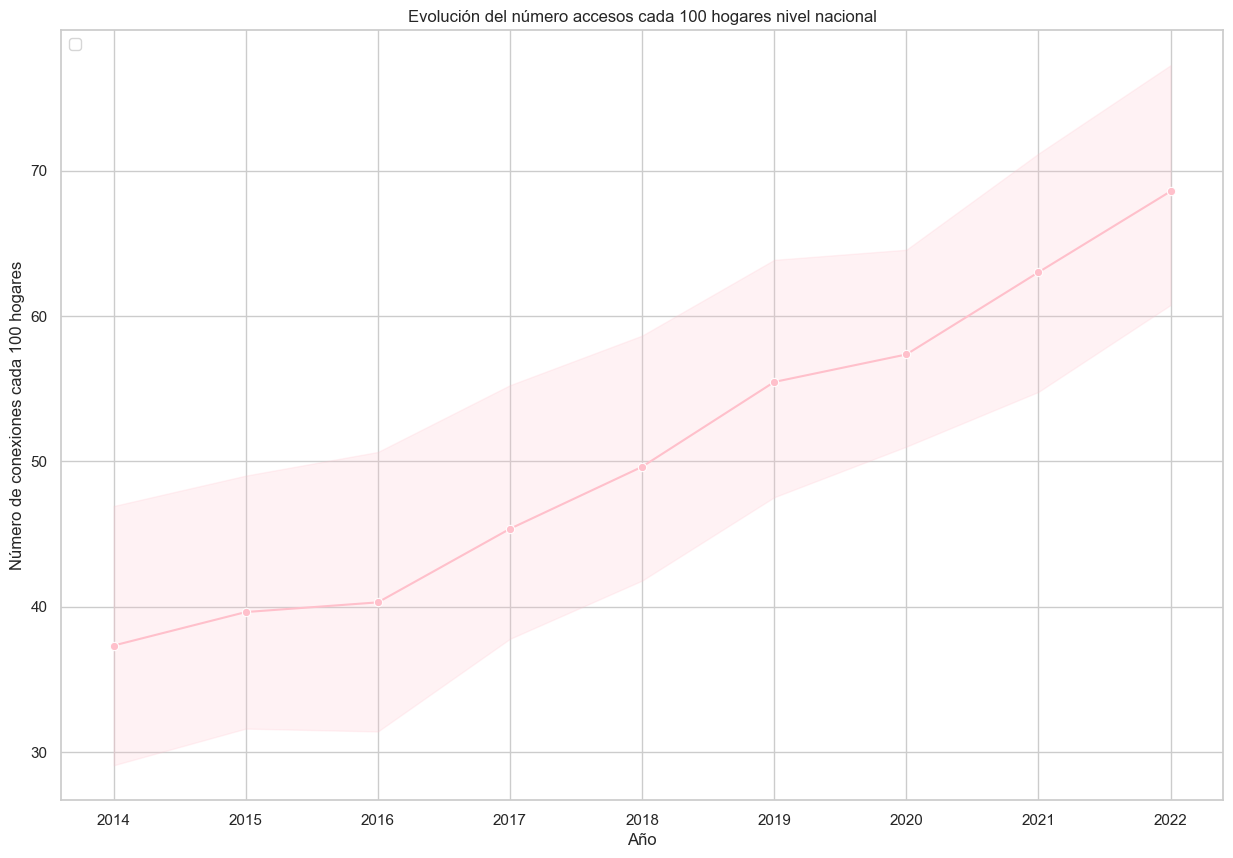

In [196]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Accesos por cada 100 hogares', color='pink', data=df6_nacional_1, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 hogares')
plt.title('Evolución del número accesos cada 100 hogares nivel nacional')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Se observa lo esperado como hipotesis inicial, dada la consideración de los hogares independientemente de los habitantes se ve un claro aumento a nivel cantidad de penetraciones de internet fijo. Sin embargo la dispersión en torno a provincias se observa similar.

### Observando la evolución y dispersión en función de trimestres a nivel nacional

In [ ]:
df6_nacional_2 = df6[['Año', 'Trimestre', 'Accesos por cada 100 hogares']].groupby(['Año', 'Trimestre']).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


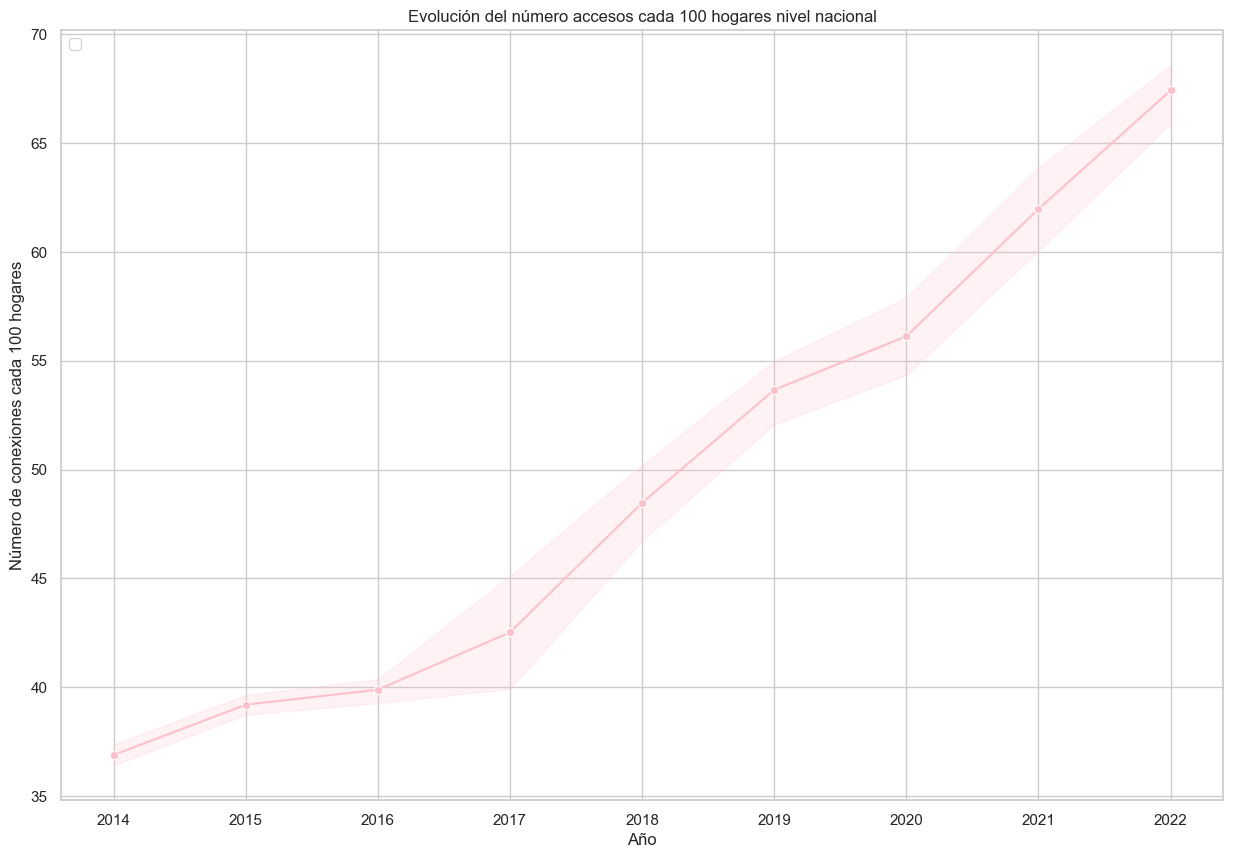

In [ ]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Accesos por cada 100 hogares', color='pink', data=df6_nacional_2, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 hogares')
plt.title('Evolución del número accesos cada 100 hogares nivel nacional')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Como en el gráfico anterior, se destaca un aumento en contraste con el acceso cada 100 habitantes pero manteniendo la dispersión observada a simple vista.

### Observando las evolución en función de provincias

In [199]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df6.groupby('Provincia')['Accesos por cada 100 hogares'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df6['Provincia'] = pd.Categorical(df6['Provincia'], categories=sorted_provincias, ordered=True)

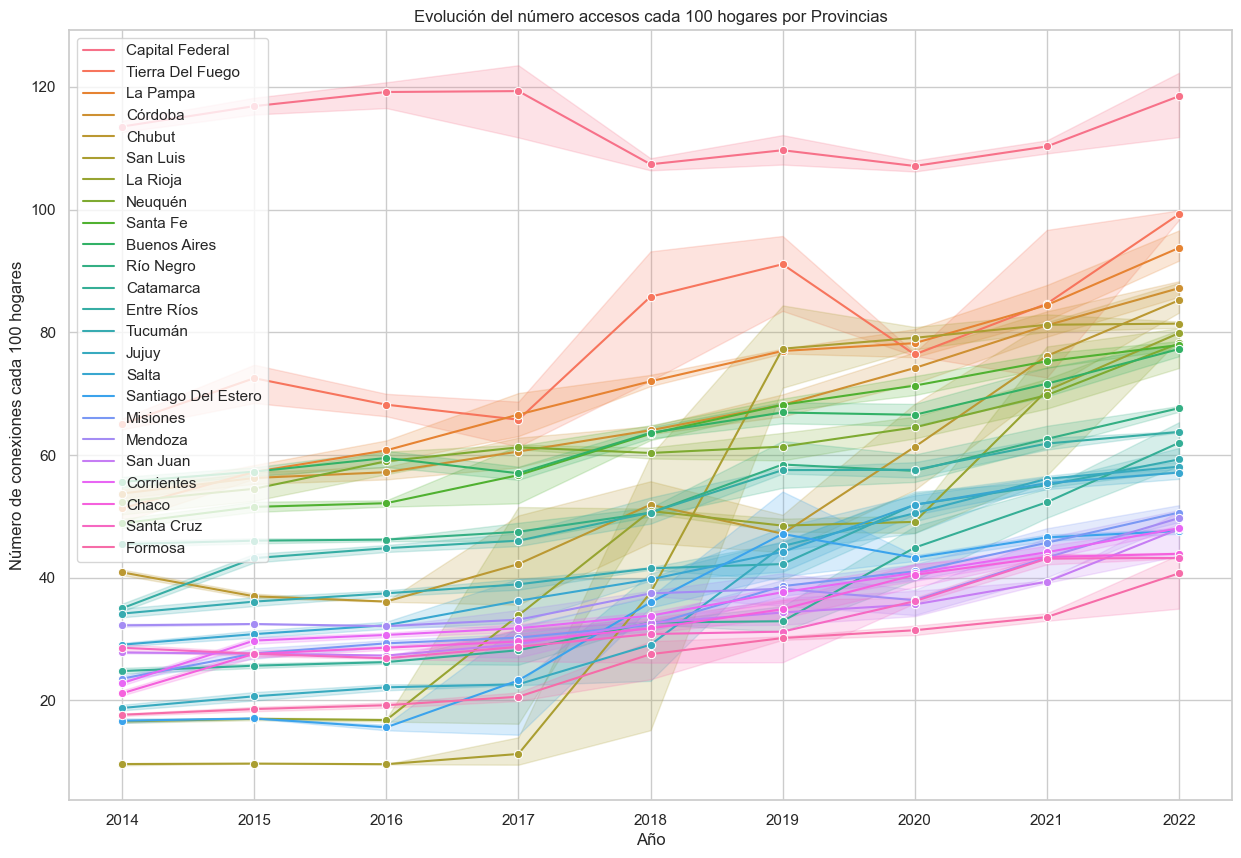

In [200]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', color='pink', data=df6, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 hogares')
plt.title('Evolución del número accesos cada 100 hogares por Provincias')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Como era de esperarse, en las zonas más urbanizadas y centralizadas, teniendo en cuenta solo los hogares encontramos valores incluso por encima de los 100 accesos por cada 100 hogares, lo que indica hogares con más de 1 penetración de internet fijo.

Nuevamente como en el acceso cada 100 habitantes, las provincias con menor cantidad de habitantes y por ende también de hogares escalan a los valores más altos, destacándose la aparición de La Pampa, Tierra del Fuego y Chubut, lugares que contienen baja cantidad de habitantes en función de área.

Otro dato interesantes a observar es el elevado pico de San Luis a partir del año 2017, se observa con más detalle a continuación. Esto se debe a politicas desarrolladas en dicha provincia.

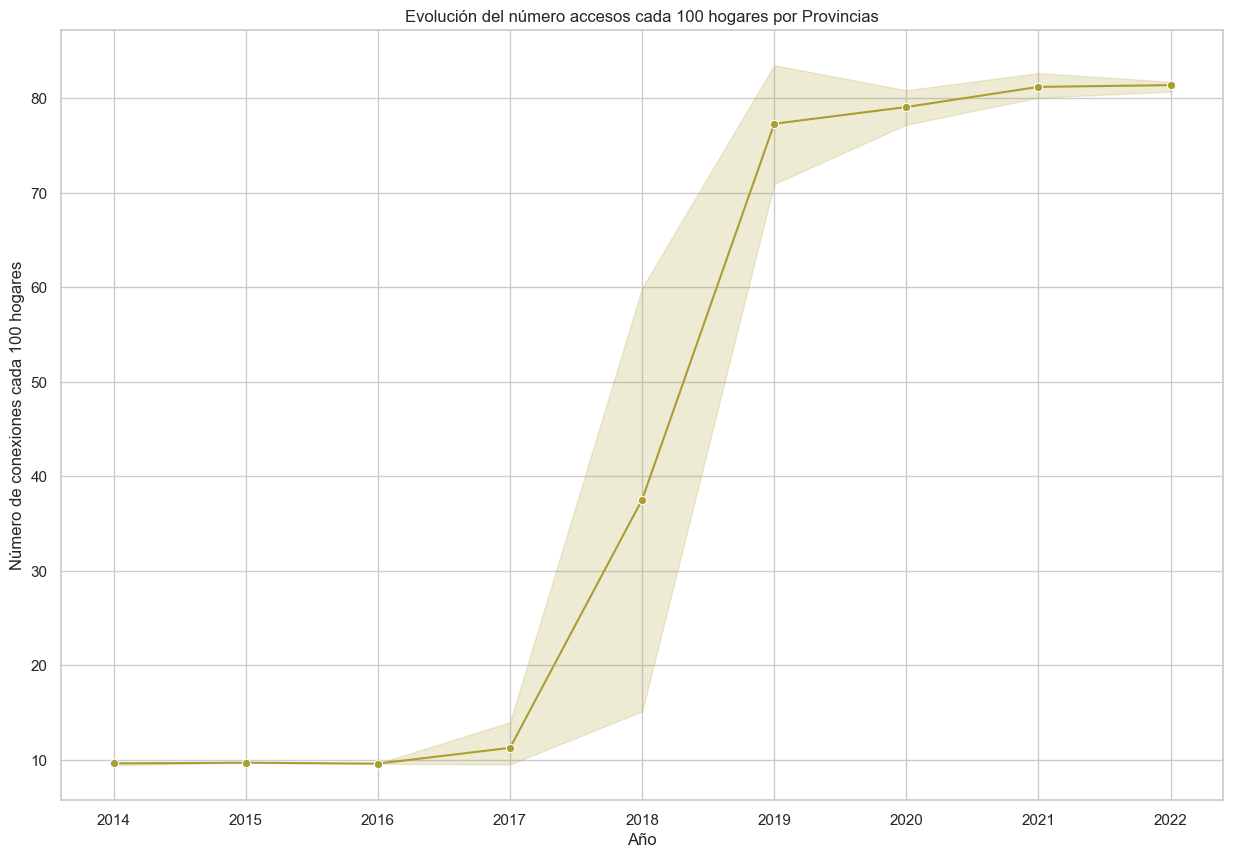

In [217]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

aux = df6[df6['Provincia'] == 'San Luis']

sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', color='pink', data=aux, marker='o', legend=False)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 hogares')
plt.title('Evolución del número accesos cada 100 hogares por Provincias')

plt.show()

Teniendo en cuenta esto, un buen punto de enfoque para marcar objetivos, es enmarcar las provincias con ciudades grandes y centralizadas que no destacan como Capital Federal, es decir, podríamos enmarcar en este caso Salta, Santa Fe, Chaco, Corrientes y Entre Ríos. Donde estas últimas se encuentran limítrofes. En torno a esto podemos plantear un buen punto de despliegue en esa zona.

In [45]:
provinicas_interes = ['Santa Fe', 'Entre Ríos', 'Chaco', 'Corrientes']
aux = df6[df6['Provincia'].isin(provinicas_interes)]

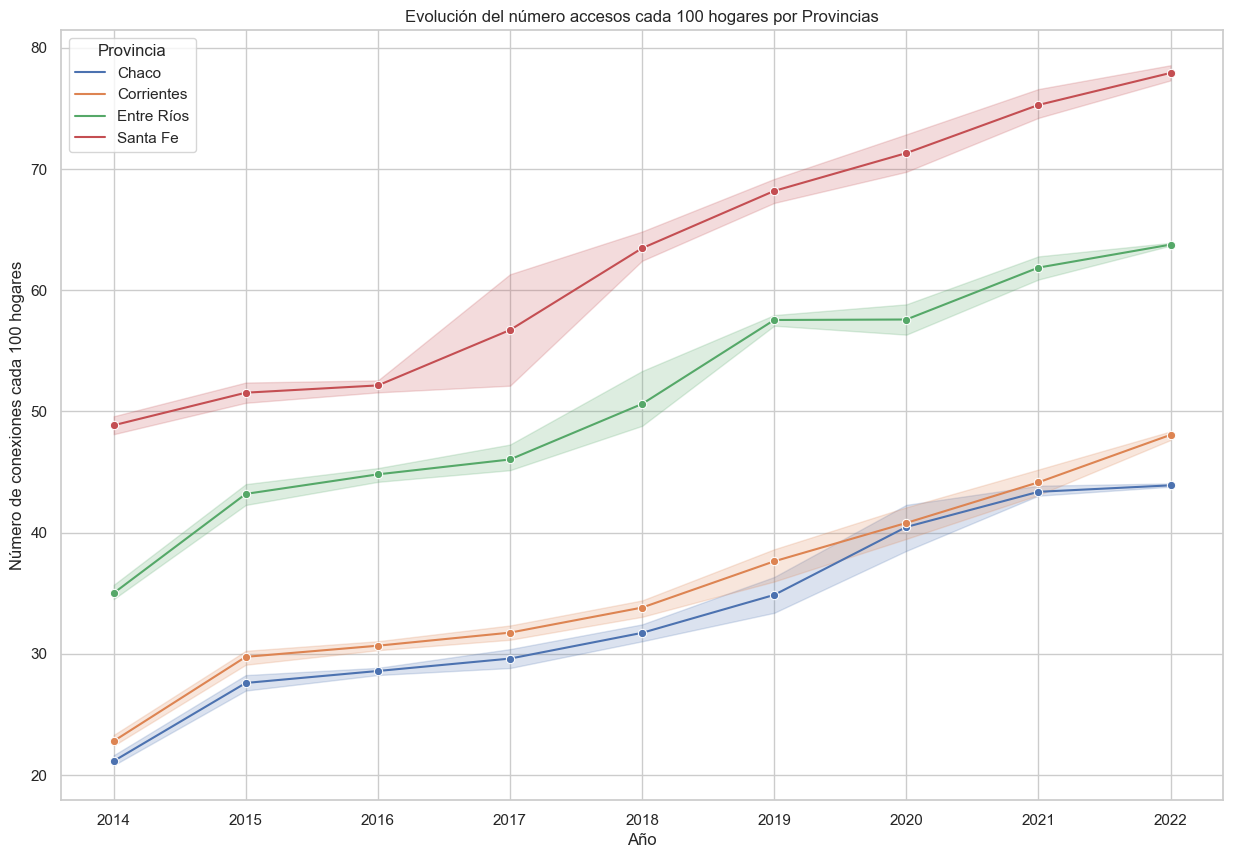

In [47]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', color='pink', data=aux, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones cada 100 hogares')
plt.title('Evolución del número accesos cada 100 hogares por Provincias')

plt.show()

Se puede ver una clara tendencia de expansión, lo que sería un buen punto de partida, desviando la mirada de las grandes metrópolis como Capital Federal, Buenos Aires y Córdoba.

## Archivo  --> **ingresos_por_la_operacion_del_servicio_de_internet_fijo.csv**

In [192]:
diccio_nombres['df7']

'ingresos_por_la_operacion_del_servicio_de_internet_fijo.csv'

In [8]:
df7 = pd.read_csv('./datastreams/' + diccio_nombres['df7'])
df7.head()

Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2022          3                   67055930  Jul-Sept 2022
1  2022          2                   60335724   Abr-Jun 2022
2  2022          1                   55589997   Ene-Mar 2022
3  2021          4                   45467887   Oct-Dic 2021
4  2021          3                   42999944  Jul-Sept 2021

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


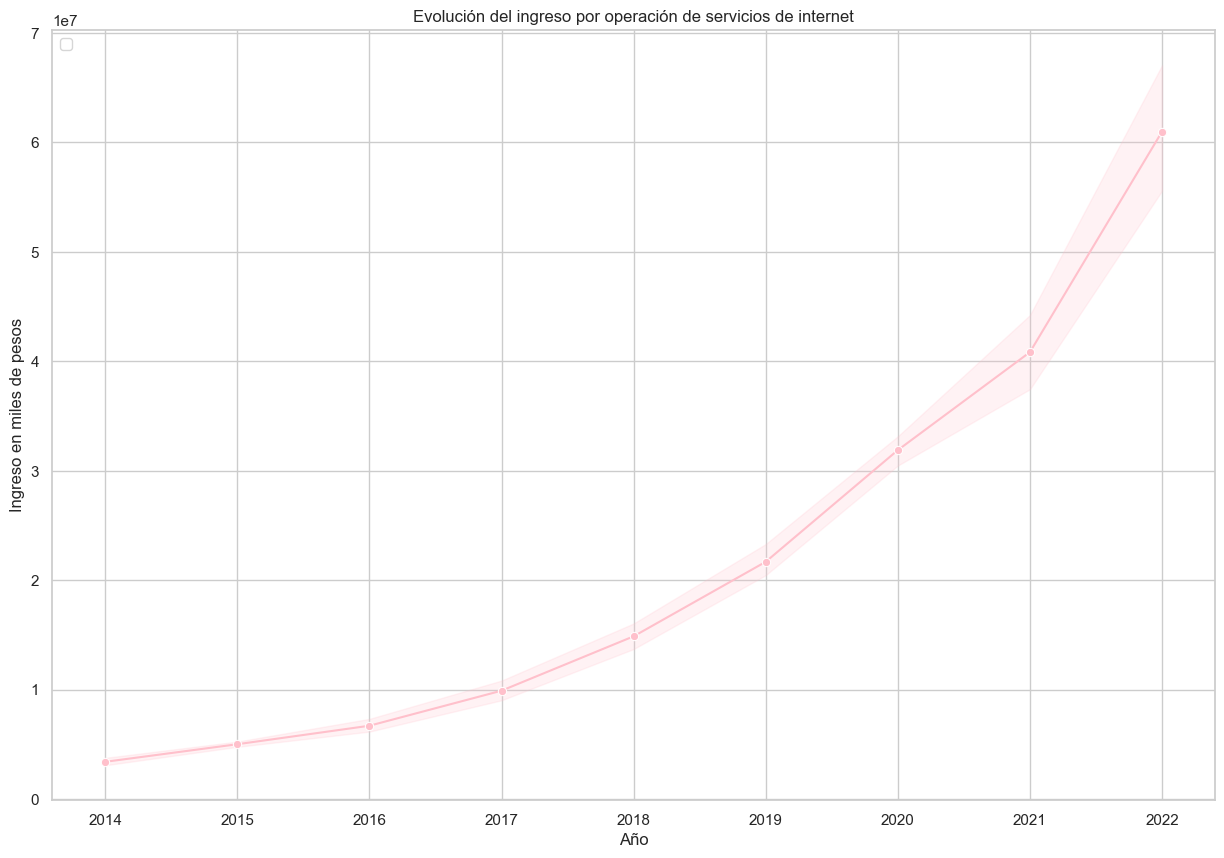

In [6]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))


sns.lineplot(x='Año', y='Ingresos (miles de pesos)', color='pink', data=df7, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Ingreso en miles de pesos')
plt.title('Evolución de los Ingresos trimestrales de los operadores por el servicio de Internet fijo')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Independientemente de las cifras numéricas se puede observar que el constante aumento de los ingresos

## Archivos extra, nombres y diccionario de guía

In [3]:
archivos = os.listdir('./externaldata/')

archivos = [file for file in archivos if file.endswith('.csv') ]

externos = {'df_e{}'.format(i+1): file for i, file in enumerate(archivos)}

In [4]:
externos

{'df_e1': 'Penetración_provincial_telefonia_fija_accesos_cada_100_hogares.csv',
 'df_e2': 'provincias.csv',
 'df_e3': 'Velocidad_media_de_bajada_de _Internet_fijo_por_provincia.csv'}

## Archivos extras --> **Velocidad_media_de_bajada_de _Internet_fijo_por_provincia.csv**

Mal ubicado en Servicios Postales

In [24]:
df_e3 = pd.read_csv('./externaldata/' + externos['df_e3'])
df_e3.head()

Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2022          3     Buenos Aires                   70.19
1  2022          3  Capital Federal                  101.05
2  2022          3        Catamarca                   60.99
3  2022          3            Chaco                   53.21
4  2022          3           Chubut                   15.57

In [73]:
df_e3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [76]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df_e3.groupby('Provincia')['Mbps (Media de bajada)'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df_e3['Provincia'] = pd.Categorical(df_e3['Provincia'], categories=sorted_provincias, ordered=True)

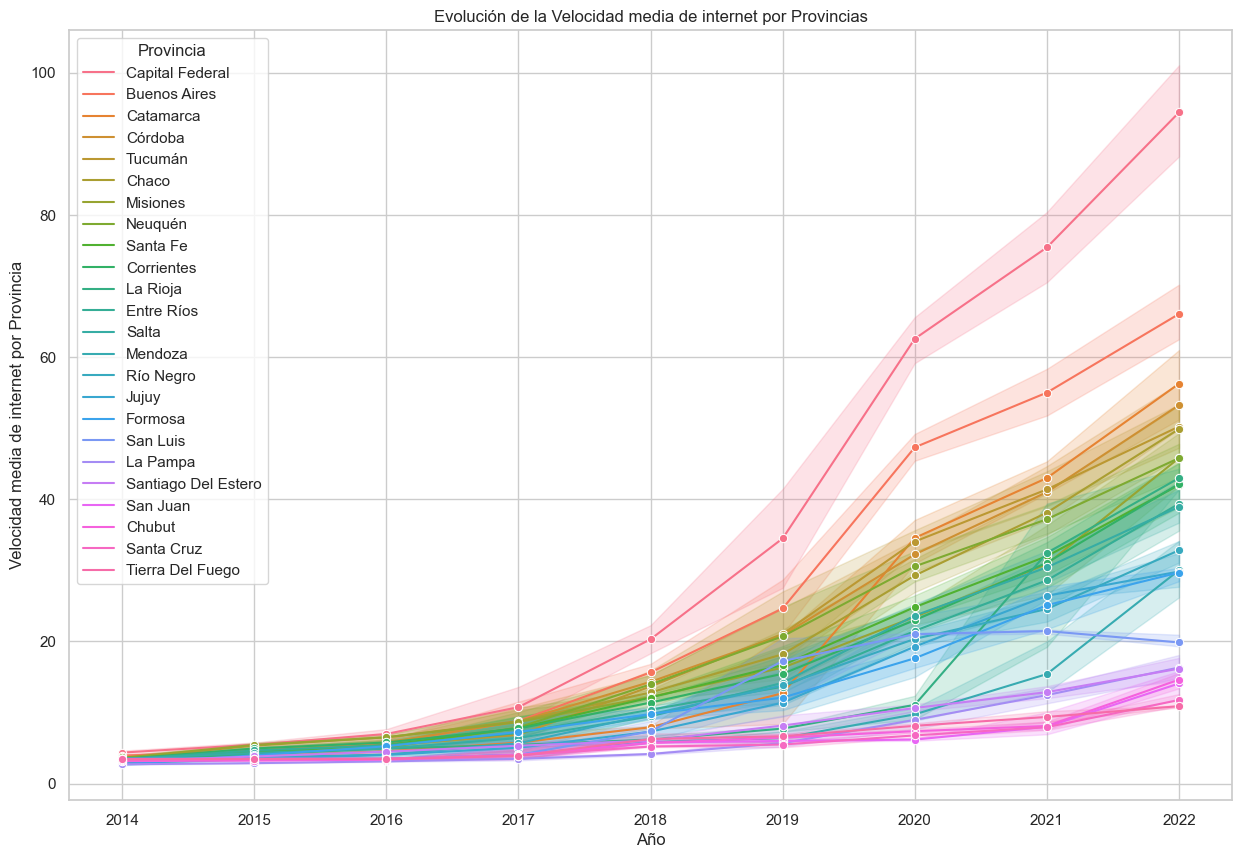

In [77]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

sns.lineplot(x='Año', y='Mbps (Media de bajada)', hue='Provincia', color='pink', data=df_e3, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Velocidad media de internet por Provincia')
plt.title('Evolución de la Velocidad media de internet por Provincias')

plt.show()

In [25]:
provincias_interes = ['Santa Fe', 'Entre Ríos', 'Chaco', 'Corrientes', 'Formosa', 'Misiones']
aux = df_e3[ df_e3.Provincia.isin(provincias_interes)]

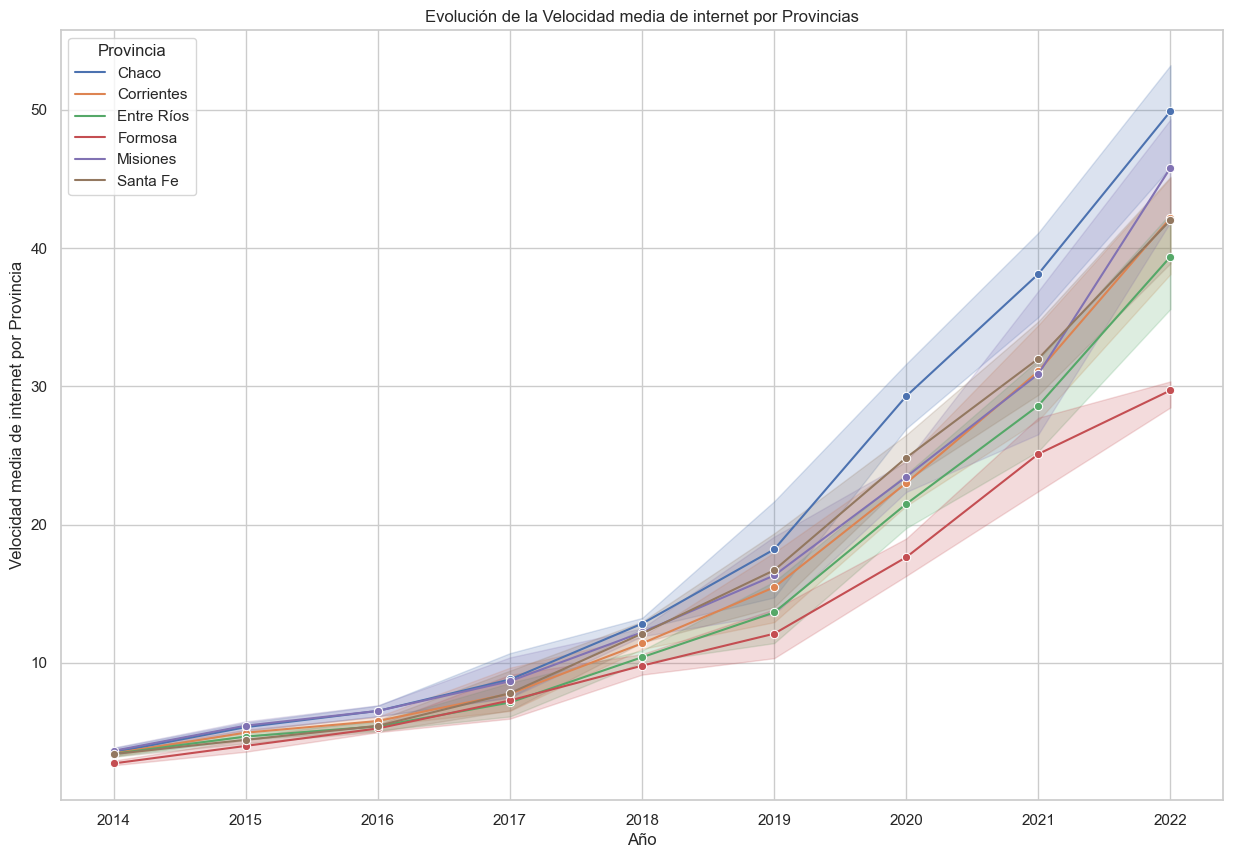

In [26]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

sns.lineplot(x='Año', y='Mbps (Media de bajada)', hue='Provincia', color='pink', data=aux, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Velocidad media de internet por Provincia')
plt.title('Evolución de la Velocidad media de internet por Provincias')

plt.show()

La tendencia marcada de las provincias pertenecientes al área del litoral en mejorar sus servicios se mantiene en crecimiento. Se resalta el interés de desarrollo en el área. Sin embargo ronda entre 30-50 MB/S, aprovechando esto se puede intentar penetrar en el servicio con velocidades superiores, siguiendo las tendencias de las provincias más grandes y desarrolladas, como Buenos Aires y Capital Federal.

## Archivos extras --> **Penetración_provincial_telefonia_fija_accesos_cada_100_hogares.csv**


In [5]:
externos['df_e1']

'Penetración_provincial_telefonia_fija_accesos_cada_100_hogares.csv'

In [6]:
df_e1 = pd.read_csv('./externaldata/' + externos['df_e1'])
df_e1.head()

Año  Trimestre        Provincia  Accesos telefonía fija por cada 100 hab  \
0  2014          1     Buenos Aires                                    26.72   
1  2014          1  Capital Federal                                    52.66   
2  2014          1        Catamarca                                    10.03   
3  2014          1            Chaco                                     9.09   
4  2014          1           Chubut                                    17.66   

   Accesos telefonía fija por cada 100 hogares  
0                                        85.26  
1                                       128.57  
2                                        39.45  
3                                        34.02  
4                                        57.59

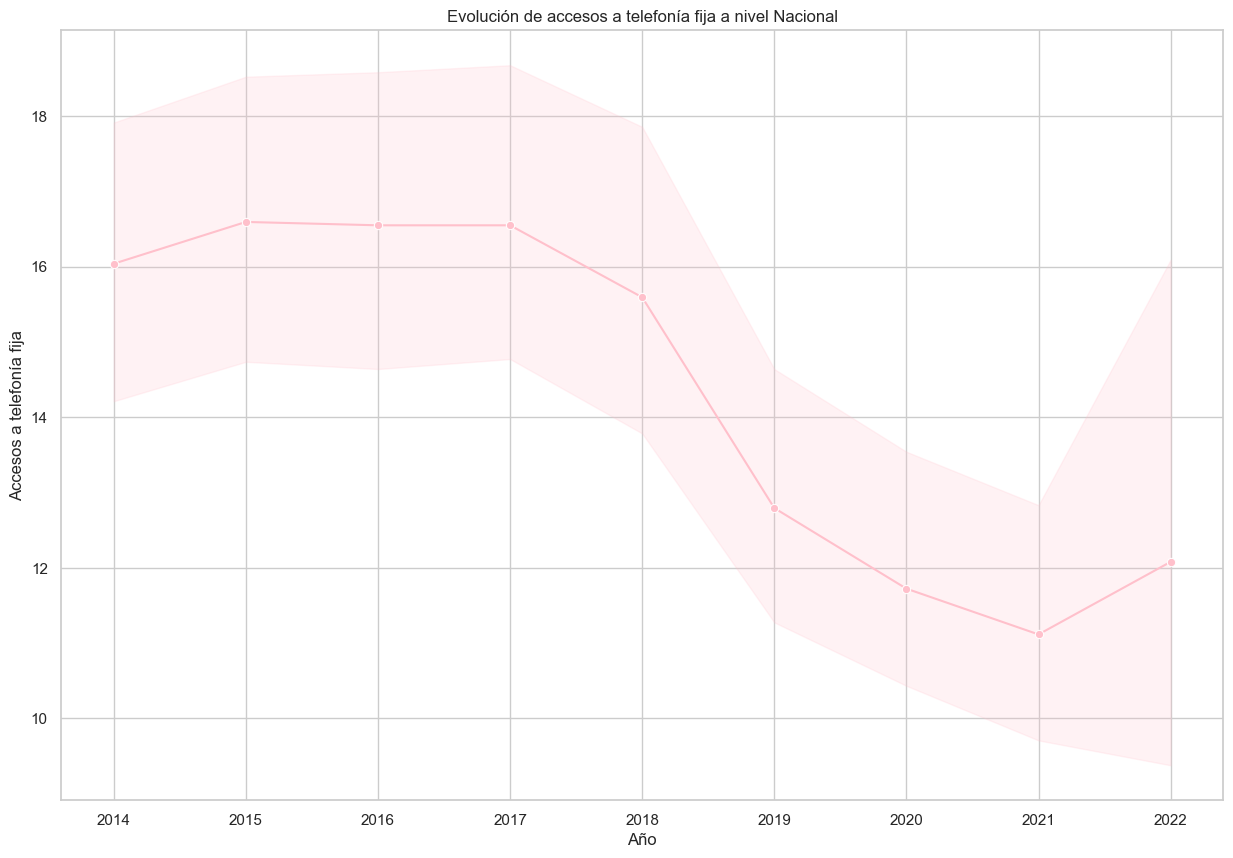

In [7]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

sns.lineplot(x='Año', y='Accesos telefonía fija por cada 100 hab', color='pink', data=df_e1, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos a telefonía fija')
plt.title('Evolución de accesos a telefonía fija a nivel Nacional')

plt.show()

In [84]:
# Calcula los valores máximos de la variable 'Y' por provincia
max_values = df_e3.groupby('Provincia')['Mbps (Media de bajada)'].max()

# Ordena la lista de provincias en base a los valores máximos
sorted_provincias = max_values.sort_values(ascending=False).index.tolist()

# Asigna el orden de las provincias en el DataFrame
df_e3['Provincia'] = pd.Categorical(df_e3['Provincia'], categories=sorted_provincias, ordered=True)

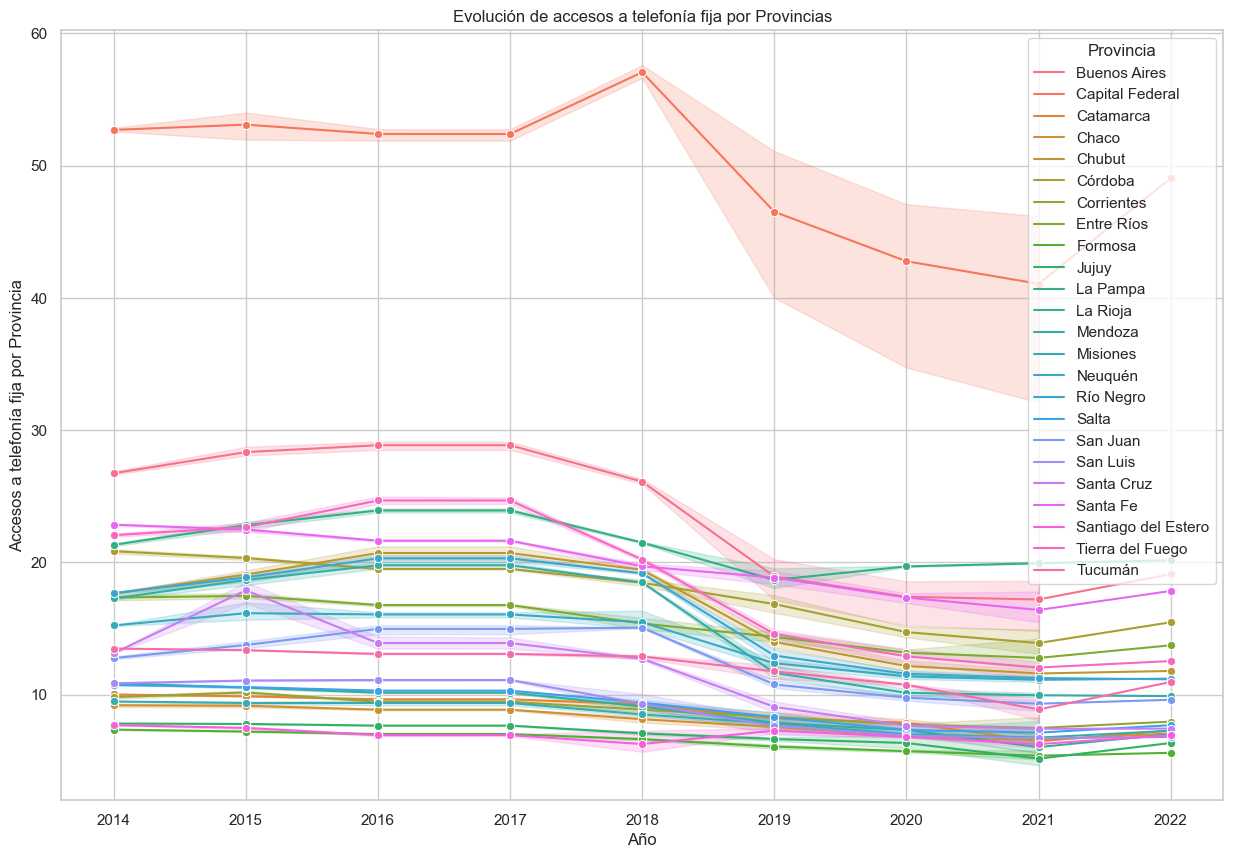

In [85]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

sns.lineplot(x='Año', y='Accesos telefonía fija por cada 100 hab', hue='Provincia', color='pink', data=df_e1, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos a telefonía fija por Provincia')
plt.title('Evolución de accesos a telefonía fija por Provincias')

plt.show()

In [82]:
provincias_interes = ['Santa Fe', 'Entre Ríos', 'Chaco', 'Corrientes']
aux = df_e1[ df_e1.Provincia.isin(provincias_interes)]

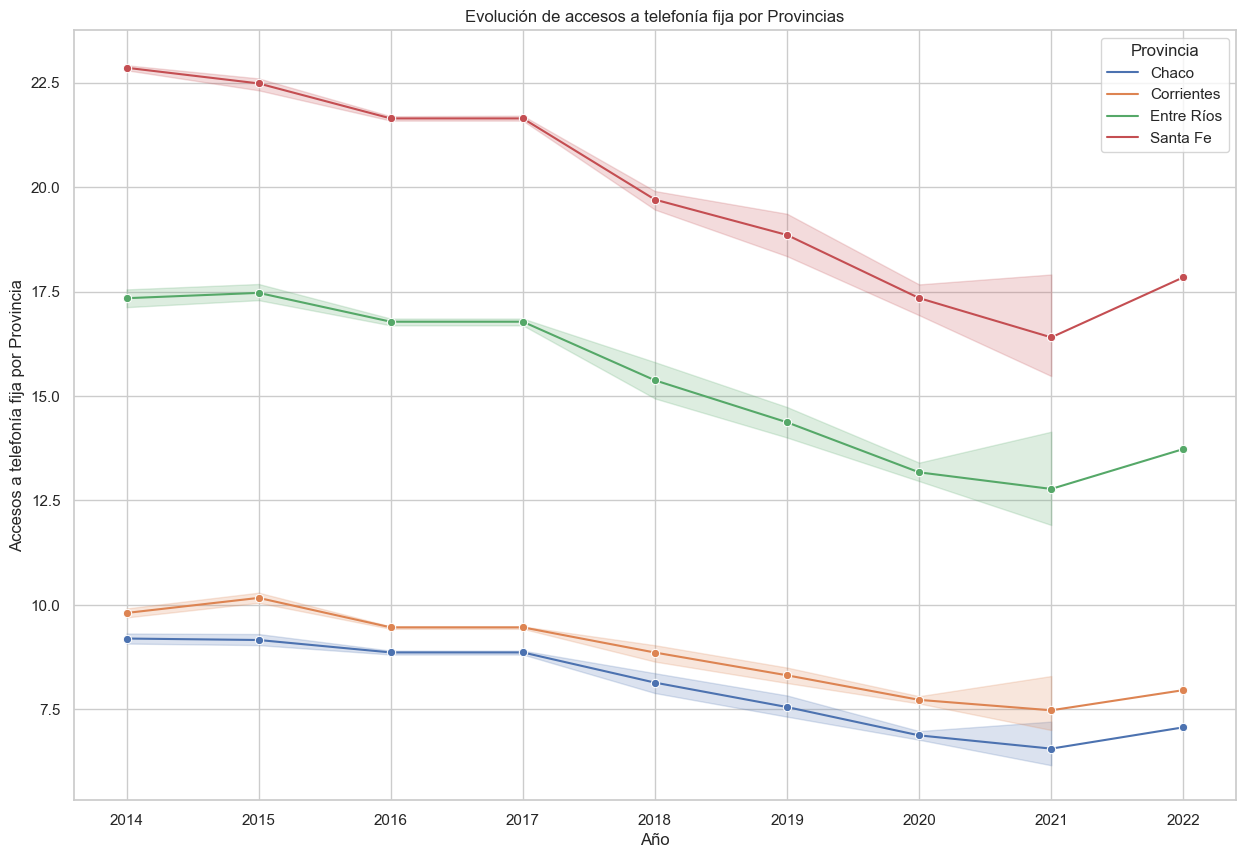

In [83]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

sns.lineplot(x='Año', y='Accesos telefonía fija por cada 100 hab', hue='Provincia', color='pink', data=aux, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos a telefonía fija por Provincia')
plt.title('Evolución de accesos a telefonía fija por Provincias')

plt.show()

En función de los datos se puede observar una tendencia general a la disminución de las lineas telefónicas a nivel nacional, sin embargo en el último año del cual se poseen datos se observa un ligero aumento en el promedio. Podría tenerse en cuenta a la hora de la elección de las tecnologías para la prestación de servicios. Sin embargo, dada la tendencias de aumento de velocidades no se observa viabilidad en este camino. Pero por otro lado, si se quiere realizar una inversión en el sector telefoníco, podría ser un buen momento, a la vez que incorporar algún paquete básico de internet de la mano de este medio.

# **CONCLUSIONES**

### Se selecciona el área del literal dado que es un área de gran porte y cuenta con provincias con gran cantidad de habitantes. A su vez cuenta con ciudades grandes y buen desarrollo urbano.
### Otro punto que se destaca es que la provincia de Santa Fé, destaca en desarrollo y número de habitantes junto con Buenos Aires, Capital Federal y Córdoba, de manera que se tendría en los objetivos una de las principales provincias a nivel consumo, conclusión respaldada por todos los gráficos y análisis previos.

### A su vez se observa la tendencia hacia el aumento de velocidades de conexión, lo que conlleva consigo la disminución de lineas de baja velocidad como por ejemplo las de tipo **ADSL**, esto va de la mano con el **desuso** de **lineas telefónicas fijas**.

### Este punto también refiere a apuntar a tecnologías como **Cable Módem** y **Fibra Óptica**, las cuales permiten velocidades más altas de conexión, a la vez que demuestran su amplio uso a nivel nacional.

### Teniendo en cuenta estos puntos se puede definir el área del litoral como un buen punto de inicio, llevando esto de la mano de las tecnologías **Fibra Óptica** y **Cable Módem**, a su vez, estas tecnologías superan la velocidad media observada en el área, pudiendo apuntar a ofrecer servicios de mayor velocidad, esto se ve respaldado por la tendencia de los usuarios a ir mejorando los servicios consumidos a través del tiempo.

### Sin embargo, si se requiere apuntar a lineas telefónicas fijas podrías ser un buen momento dada la observación de un leve crecimiento a nivel nacional, esto podría hacerse de la mano de un paquete básico de acceso a internet explotando al máximo las velocidades permitidas por esta vía.